<center><font color= 'Black' style = 'font-family:verdana ; font-size:25px'>Booms Bike Case Study</font></center>
<hr style="color: black; height: 1px;">
<font color= '#067F7D' style = 'font-family:cambria ; font-size:20px'>Problem Statement </font><br>

<font color="black" style="font-family:Cambria ;font-size:18px">Boombikes, A US Bike-Sharing Provider, Faces Revenue Declines Amid The Ongoing Pandemic. To Revive Its Business Post-Lockdown, Boombikes Aims To Assess The Demand For Shared Bikes After The Quarantine Period. They've Enlisted A Consulting Company To Identify Key Factors Influencing Bike Demand In The American Market, Seeking Insights Into Significant Variables And Their Predictive Power. Using A Comprehensive Dataset Encompassing Meteorological Surveys And Lifestyle Factors, Boombikes Aims To Develop A Strategic Plan To Thrive In The Post-Covid-19 Market.</font><br>

<font color= '#067F7D' style = 'font-family:Cambria ; font-size:20px'>Business Problem Overview</font><br>

<font color="black" style="font-family:Cambria ;font-size:18px">The objective is to model the demand for shared bikes, utilizing available independent variables. The model will guide management in understanding `demand variations with different features`, enabling strategic `adjustments to meet customer expectations`. Additionally, it provides insights into the demand dynamics of a new market.</font

<b><font color=green style='font-family:Cambria; font-size:20px'>To Build A Linear Regression Model There Are Some Basic Steps :</font><b>
<hr style='height:1px'>

<b><font color=black style='font-family:Cambria; font-size:17px'>1. Data Reading and Understanding:</font></b><br>

- <font color=brown style='font-family:Cambria; font-size:15px'>`Load Libraries`: Import necessary libraries like pandas, numpy, matplotlib, and seaborn.</font>
- <font color=brown style='font-family:Cambria; font-size:15px'>`Load Data`: Read your dataset into a DataFrame using pandas.</font>
- <font color=brown style='font-family:Cambria; font-size:15px'>`Explore Data`: Check the first few rows, data types, and summary statistics to understand the dataset.</font>

<b><font color=black style='font-family:Cambria; font-size:17px'>2. Data Preprocessing:</font></b><br>

- <font color=brown style='font-family:Cambria; font-size:15px'>`Handle Missing Values`: Impute or remove missing values.</font>
- <font color=brown style='font-family:Cambria; font-size:15px'>`Encode Categorical Variables`: Convert categorical variables into numerical format.</font>
- <font color=brown style='font-family:Cambria; font-size:15px'>`Feature Scaling`: Scale numerical features if needed.</font>

<b><font color=black style='font-family:Cambria; font-size:17px'>3. Data Visualization:</font></b><br>

- <font color=brown style='font-family:Cambria; font-size:15px'>`Correlation Analysis`: Check correlation between variables.</font>
- <font color=brown style='font-family:Cambria; font-size:15px'>`Pair Plots`: Use pair plots to visualize relationships between variables.</font>
- <font color=brown style='font-family:Cambria; font-size:15px'>`Scatter Plots`: Plot scatter plots for individual features against the target variable.</font>

<b><font color=black style='font-family:Cambria; font-size:17px'>4. Train-Test Split:</font></b><br>

- <font color=brown style='font-family:Cambria; font-size:15px'>`Split Data`: Divide the data into training and testing sets.</font>

<b><font color=black style='font-family:Cambria; font-size:17px'>5. Model Building:</font></b><br>

- <font color=brown style='font-family:Cambria; font-size:15px'>`Import Model`: Import the Linear Regression model from scikit-learn.</font>
- <font color=brown style='font-family:Cambria; font-size:15px'>`Fit the Model`: Train the model using the training data.</font>

<b><font color=black style='font-family:Cambria; font-size:17px'>6. Model Evaluation:</font></b><br>

- <font color=brown style='font-family:Cambria; font-size:15px'>`Predictions`: Make predictions on the test set.</font>
- <font color=brown style='font-family:Cambria; font-size:15px'>`Evaluation Metrics`: Use appropriate metrics (e.g., Mean Squared Error, R-squared) to evaluate the model.</font>

<b><font color=black style='font-family:Cambria; font-size:17px'>7. Visualization of Results:</font></b><br>

- <font color=brown style='font-family:Cambria; font-size:15px'>`Actual vs. Predicted`: Plot the actual vs. predicted values to visualize the model's performance.</font>


In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 150)   # Set the maximum number of rows displayed
pd.set_option('display.max_columns', 150)

<font color="black" style ="font-family:Cambria ;font-size:18px"><b>1 & 2 Data Reading and Understanding &  Data Preprocessing: </b></font><br>

 **In This We Have Some Basic Steps**
   - **1.<FONT COLOR='TEAL' >Reading And Understanding The Data</FONT>**
   - **2.<FONT COLOR='TEAL' >Data Cleaning</FONT>**
        - **2.1 <FONT COLOR='TEAL' >Missing Values Etc....</FONT>**
   - **3. <FONT COLOR='TEAL' >Data Visualisation</FONT>**
   

In [2]:
df=pd.read_csv("day (1).csv")
df.head(4)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
df.shape

(730, 16)

In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# checking null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

-  so there is no null values so no need to handle it

In [7]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

<font color= 'green' style = 'font-family:Cambria ; font-size:20px'>Assumption 1 Of `Linear Regression` And Relation Between `Numerical Variables`</font><br>

- <font color=brown style = 'font-family:Cambria; font-size:15px'>`Linearity`: The `Relationship Between` The `Independent` And `Dependent Variables` Is Assumed To Be `Linear`. This Means That A Change In The Independent Variable Is Associated With A Constant Change In The Dependent Variable.</font><br>
- <font color=brown style = 'font-family:Cambria; font-size:15px'>Should Have The Linear Relationship Between X And Y.</font><br>


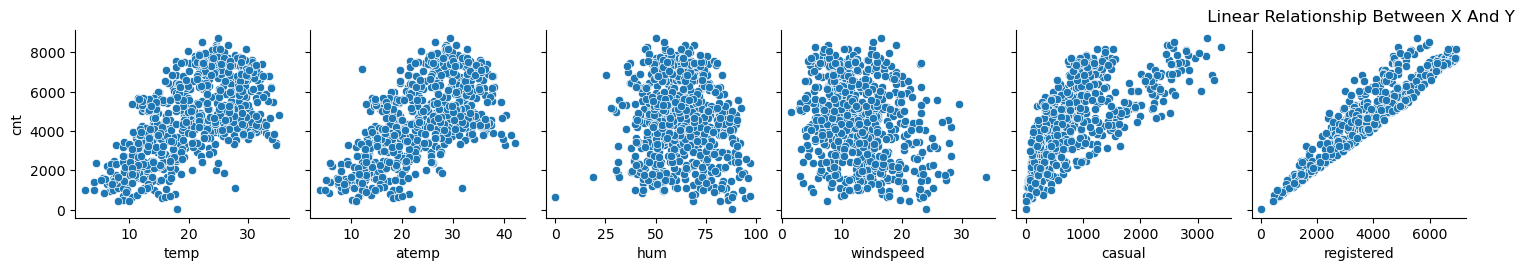

In [8]:
# plotting the pair plot
sns.pairplot(data=df,x_vars=['temp', 'atemp', 'hum', 'windspeed','casual', 'registered'],y_vars="cnt")
plt.title(" Linear Relationship Between X And Y")
plt.show()

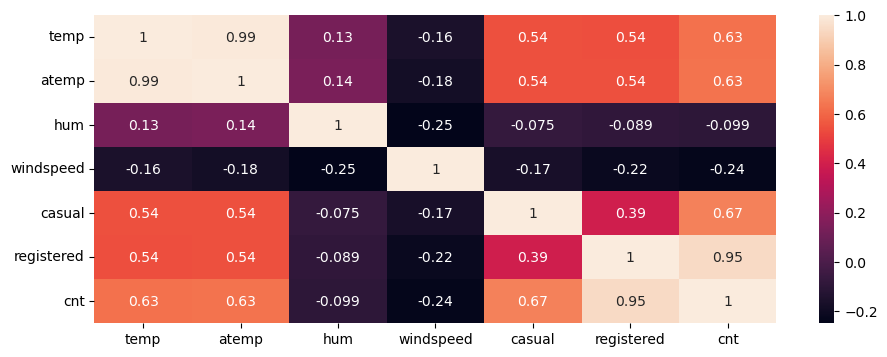

In [9]:
# plotting heat map
plt.figure(figsize=(11,4))
sns.heatmap(data=df[['temp', 'atemp', 'hum', 'windspeed','casual', 'registered',"cnt"]].corr(),annot=True)
plt.show()


- <font color="black" style ="font-family:Cambria ;font-size:18px"><b>About The Data</b></font><br>
    - <font color="brown" style ="font-family:Cambria ;font-size:15px">We Have 730 Rows And 16 Columns</font><br>
    - <font color="brown" style ="font-family:Cambria ;font-size:15px">We Have Dteday Column Basically We Have Year Month Column So We Can Drop This Column</font><br>
    - <font color="brown" style ="font-family:Cambria ;font-size:15px">The Instant Column Represented Only The How Many People Visited It Has Index Value So We Can Drop This</font><br>
    - <font color="brown" style ="font-family:Cambria ;font-size:15px">Next Cnt Which Is Our Target Variable That Is Obtained From Adding The Casual And Registered</font><br>
    

In [10]:
# changing the dtedate to datetime  
df["dteday"]=pd.to_datetime(df['dteday'])
df['weekend']=pd.DatetimeIndex(df['dteday']).day_name()

In [11]:
# we have to replace 0 for weekdays and 1 for weekend 
df['weekend']=df['weekend'].replace(["Monday","Tuesday","Wednesday","Thursday","Friday"],0).replace(["Saturday","Sunday"],1)

In [12]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekend
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0


In [13]:
# renaming the columns 
df.rename(columns={'yr':'year',"mnth":'month','hum':'humidity','cnt':"count","weathersit":'weather'},inplace=True)

<font color="black" style ="font-family:Cambria ;font-size:18px"><b>3.Data Visualization:  </b></font><br>


- <font color="black" style ="font-family:Cambria ;font-size:18px"><b>From The Columns We Have Observed That The Columns Are Different Types</b></font><br>
    - <font color="brown" style ="font-family:Cambria ;font-size:15px">`Numarical Variables` Like Temp,Atemp, Humidity,Windspeed,Count</font><br>
    - <font color="brown" style ="font-family:Cambria ;font-size:15px">`Binary Variables` Like :  Year Holiday Working Day</font><br>
    - <font color="brown" style ="font-family:Cambria ;font-size:15px">`Catagorical Variable` : Season ,Month ,Weekday And Weahter</font><br>
- <font color="brown" style ="font-family:Cambria ;font-size:15px">But From The Data Dictonary Some Columns Represented Catogorical Varibles</font><br>
- <font color="brown" style ="font-family:Cambria ;font-size:15px">Creating A New Data Frame Those Column What  We Need</b></font><br>
    

In [14]:
# creating new one with needed columns 
col=['season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
       'count', 'weekend']
df_new=df[col]
df_new.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count,weekend
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0


<font color="black" style ="font-family:Cambria ;font-size:18px"><b>  Changing The Name Of The Seasons Which Is Given In The Data Dictonary</b></font><br>
 - **season : season (1:spring, 2:summer, 3:fall, 4:winter)**

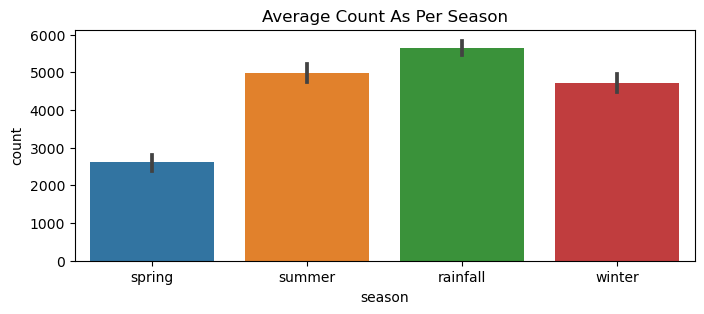

In [15]:
df_new['season']=df_new['season'].map({1:"spring",2:"summer",3:"rainfall",4:"winter"})
plt.figure(figsize=(8,3))
sns.barplot(x=df_new['season'],y=df_new['count'])
plt.title("Average Count As Per Season")
plt.show()

In [16]:
df_new['season'].value_counts()

rainfall    188
summer      184
spring      180
winter      178
Name: season, dtype: int64

<font color="black" style ="font-family:Cambria ;font-size:18px"><b>As We Observed That There Is High Demand In Rainy Season And Low Demand In Spring Season.</b></font><br>

In [17]:
# Changing the year into 0 and 1 (0:2018,1:2019)
df_new['year']=df_new['year'].map({0:2018,1:2019})
df_new['year'].value_counts()

2018    365
2019    365
Name: year, dtype: int64

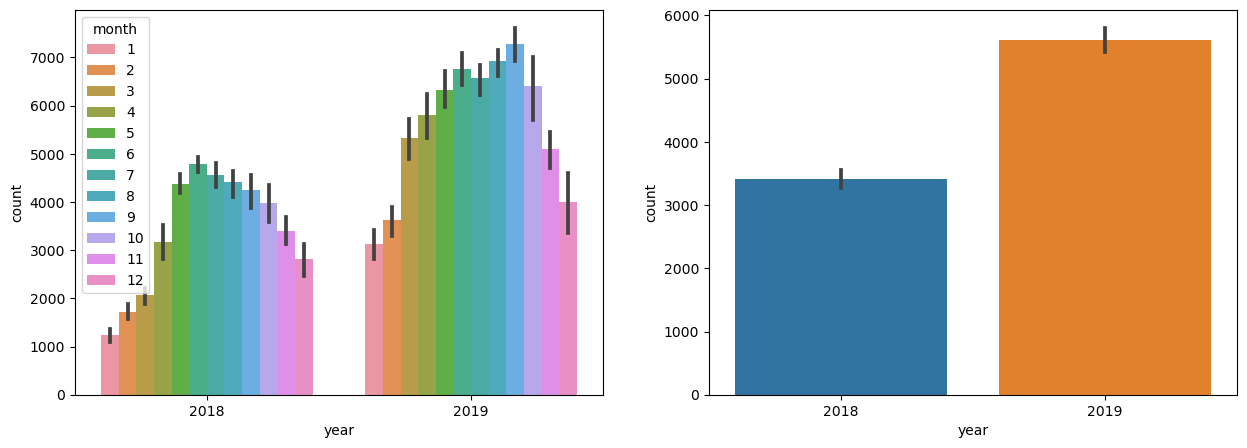

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x=df_new['year'],y=df_new['count'],hue=df_new['month'])
plt.subplot(1,2,2)
sns.barplot(x=df_new['year'],y=df_new['count'])
plt.show()

<font color="black" style ="font-family:Cambria ;font-size:18px"><b>As We Observed From Above Graph The Demand Has `Increased In 2019 Compared To 2018`</b></font><br>

In [19]:
df_new['weekday'].value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

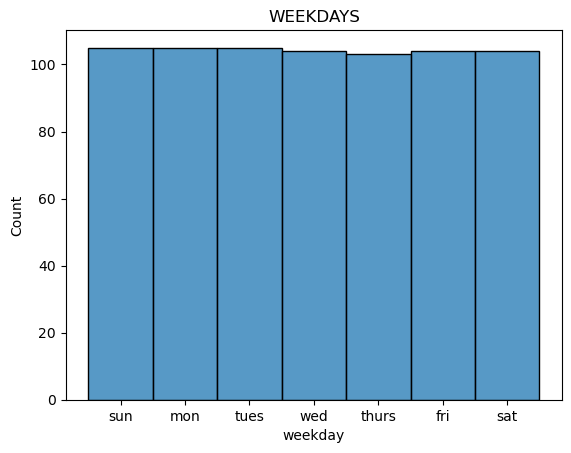

In [20]:
# changing the name of the weeks 
df_new['weekday']=df_new['weekday'].map({0:'mon',1:"tues",2:"wed",3:"thurs",4:'fri',5:"sat",6:"sun"})
sns.histplot(df_new["weekday"])
plt.title("WEEKDAYS")
plt.show()

<font color="black" style ="font-family:Cambria ;font-size:16px"><b>As We See The Graph Of The Weekday We Say That The Bike Demand Is Equall But There Is A Slighlty `Increase` In `Sun,Mon,Tue,Fri,Sat` As We Compare To  Wed And Thus</b></font><br>



In [21]:
# mapping the holidays(0:no,1:yes)
df_new["holiday"]=df_new["holiday"].map({0:"no",1:"yes"})
df_new["workingday"]=df_new["workingday"].map({0:"no",1:"yes"})

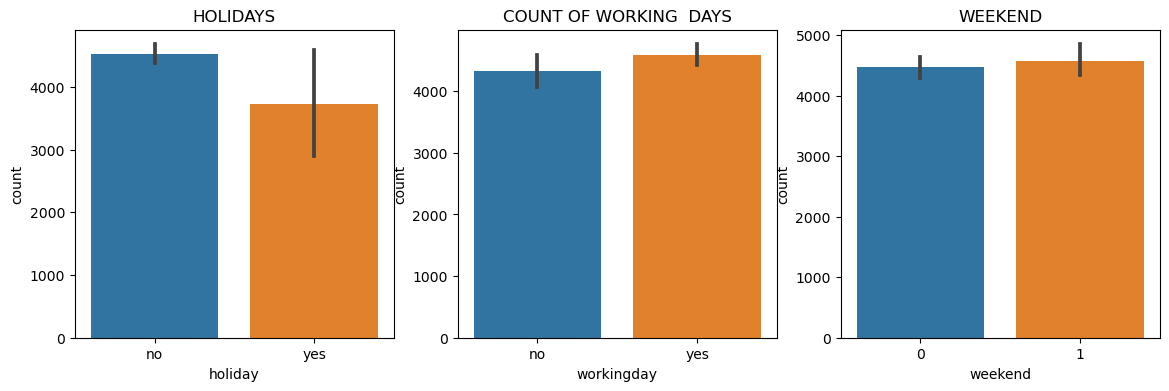

In [22]:
# plotting subgraphs on 'holidays' and "working day"
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
sns.barplot(x=df_new['holiday'],y=df_new['count'])
plt.title('HOLIDAYS')
plt.subplot(1,3,2)
sns.barplot(x=df_new['workingday'],y=df_new['count'])
plt.title('COUNT OF WORKING  DAYS')
plt.subplot(1,3,3)
sns.barplot(x=df_new['weekend'],y=df_new['count'])
plt.title('WEEKEND')
plt.show()

- <font color="black" style ="font-family:Cambria ;font-size:18px"><b>From The Followling Graph Of Holiday & Working Day We Observed That</br></font><br>
    - <font color="brown" style ="font-family:Cambria ;font-size:15px">When There Is Holiday The Demand Ia Less When Compared To No Holiday</font><br>
    - <font color="brown" style ="font-family:Cambria ;font-size:15px">When There Is Workingday The Demand Ia High When Compared To Non Working</font><br>
    - <font color="brown" style ="font-family:Cambria ;font-size:15px">In Weekends The Demaand Is Increasing</font><br>


<font color="black" style ="font-family:Cambria ;font-size:18px"><b>In The Data Dictionary We Have Season Column We Are Change Them</b></font><br>

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy =**Best CONDITION**
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist= **Better CONDITION**
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds= **Bad CONDITION**
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog = **Worst CONDITION**

In [23]:
df_new['weather']=df_new['weather'].map({1:"Best Condition",2:"Better Condition",3:"Bad Condition",4:"Worst Condition"})

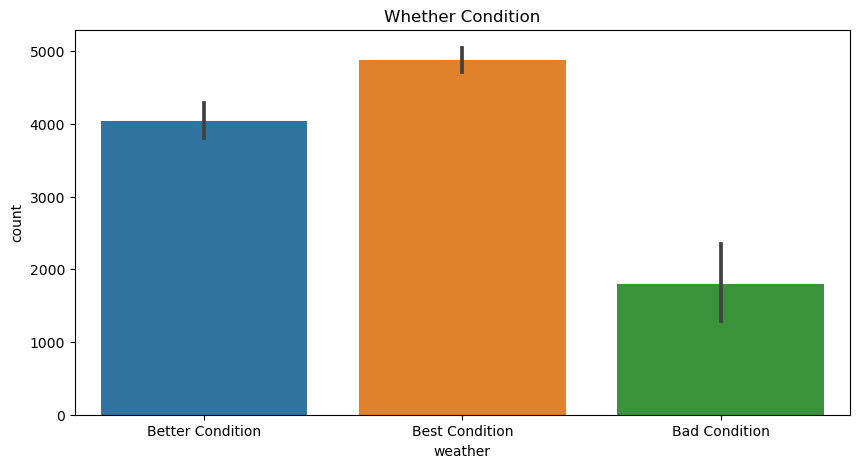

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(x=df_new["weather"],y=df_new["count"])
plt.title("Whether Condition")
plt.show()


<font color="black" style ="font-family:Cambria ;font-size:18px"><b>Observations Of The Weather Condition Barplot </b></font> 
- In Best Condition the demand of bikes increased 
- In Better Condition the demand is decreased as compared to best condiition
- In Bad Condition the demand of bikes are very less 
- in Worst Condition it completely zero no one prefer it

In [25]:
# mapping the months 
df_new['month']=df_new['month'].map({1:"jan",2:'feb',3:"mar",4:"apr",5:"may",6:"june",7:"july",8:"aug",9:"sept",10:"oct",11:"nov",12:"dec"})


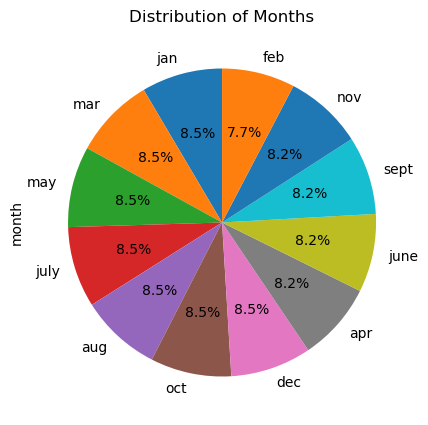

In [26]:
df_new['month'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(7, 5))
plt.title('Distribution of Months')
plt.show()

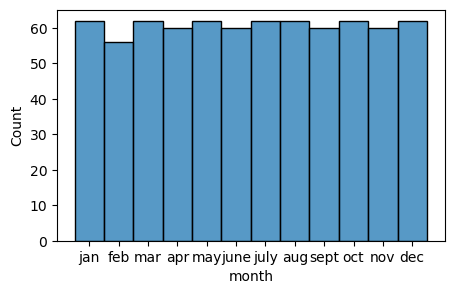

In [27]:
plt.figure(figsize=(5,3))
sns.histplot(df_new['month'])

plt.show()

<font color="black" style ="font-family:Cambria ;font-size:18px"><b>If We See The Graph Of Month We Came To Know That There Are Equall And Some Slightly Changes Will Seems To Apperr In The Month Of Jan March May Nov Dec Are High</b></font><br>

In [28]:
df_new.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count,weekend
0,spring,2018,jan,no,sun,no,Better Condition,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,2018,jan,no,mon,no,Better Condition,14.902598,17.68695,69.6087,16.652113,801,0
2,spring,2018,jan,no,tues,yes,Best Condition,8.050924,9.47025,43.7273,16.636703,1349,0
3,spring,2018,jan,no,wed,yes,Best Condition,8.200000,10.60610,59.0435,10.739832,1562,1
4,spring,2018,jan,no,thurs,yes,Best Condition,9.305237,11.46350,43.6957,12.522300,1600,0


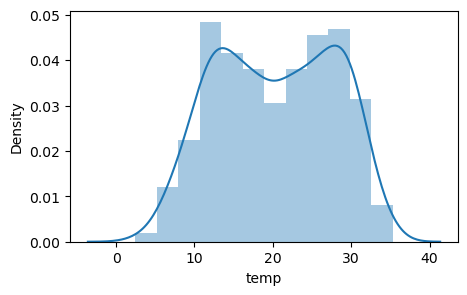

In [29]:
# temperature
plt.figure(figsize=(5,3))
sns.distplot(df_new['temp'])
plt.show()

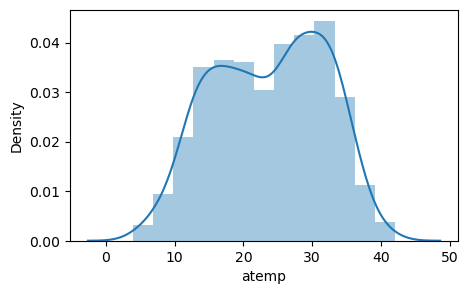

In [30]:
# atemp
plt.figure(figsize=(5,3))
sns.distplot(df_new['atemp'])
plt.show()

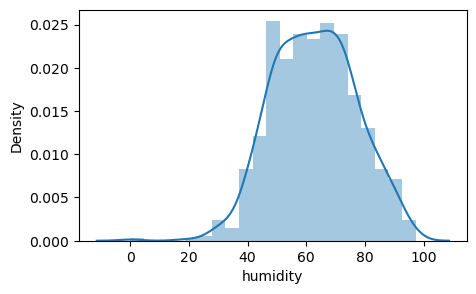

In [31]:
# humidity
plt.figure(figsize=(5,3))
sns.distplot(df_new['humidity'])
plt.show()

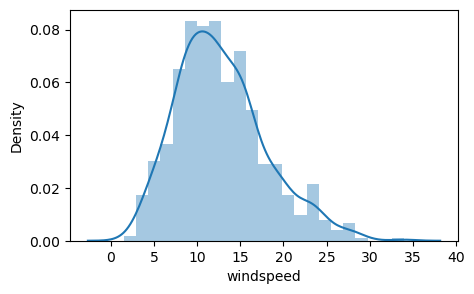

In [32]:
# wind speed
plt.figure(figsize=(5,3))
sns.distplot(df_new['windspeed'])
plt.show()

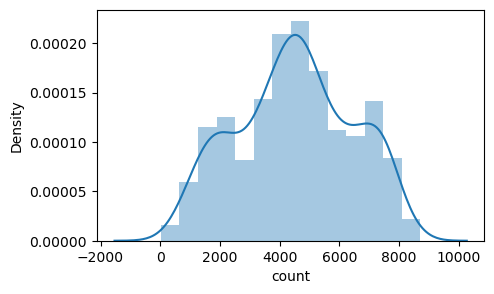

In [33]:
# target variable 'count'
plt.figure(figsize=(5,3))
sns.distplot(df_new['count'])
plt.show()

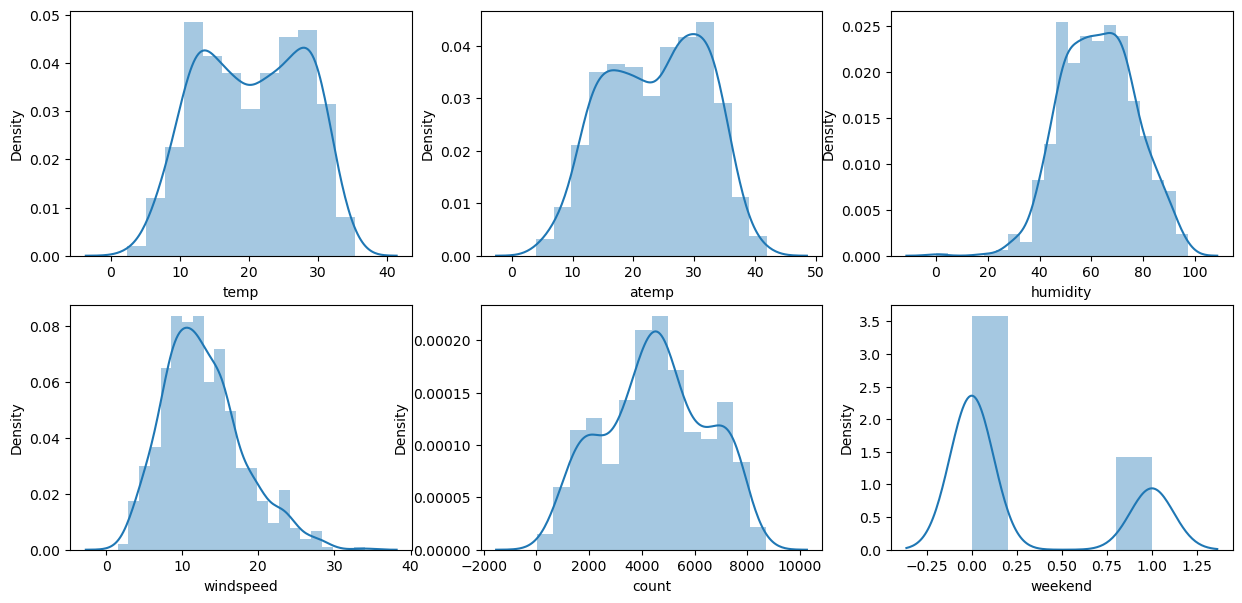

In [34]:
# subplotting all numerical variables
plt.figure(figsize=(15,7))
plt.subplot(2,3,1)
sns.distplot(df_new['temp'])
#----------------------------------------------------------------
plt.subplot(2,3,2)
sns.distplot(df_new['atemp'])
#----------------------------------------------------------------
plt.subplot(2,3,3)
sns.distplot(df_new['humidity'])
#----------------------------------------------------------------
plt.subplot(2,3,4)
sns.distplot(df_new['windspeed'])
#----------------------------------------------------------------
plt.subplot(2,3,5)
sns.distplot(df_new['count'])
#----------------------------------------------------------------
plt.subplot(2,3,6)
sns.distplot(df_new['weekend'])
#----------------------------------------------------------------

plt.show()

In [35]:
df_new.isnull().sum()

season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
weekend       0
dtype: int64

In [36]:
df_new["year"]

0      2018
1      2018
2      2018
3      2018
4      2018
       ... 
725    2019
726    2019
727    2019
728    2019
729    2019
Name: year, Length: 730, dtype: int64

- **creating a dummy variable of 2018 & 2019**
- **0 is 2018**
- **1 is 2019**

In [37]:
yr_dummy=pd.get_dummies(df_new['year'],drop_first=True)


In [38]:
yr_dummy.head(3)

,2019
0,0
1,0
2,0


In [39]:
df_new.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'count',
       'weekend'],
      dtype='object')

In [40]:
# creating dummies list for some columns 
listdum=['season','month','holiday','weekday' ,'workingday','weather','weekend']


In [41]:
pd.get_dummies(df_new[listdum]).columns

Index(['weekend', 'season_rainfall', 'season_spring', 'season_summer',
       'season_winter', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_july', 'month_june', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sept', 'holiday_no', 'holiday_yes',
       'weekday_fri', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thurs', 'weekday_tues', 'weekday_wed', 'workingday_no',
       'workingday_yes', 'weather_Bad Condition', 'weather_Best Condition',
       'weather_Better Condition'],
      dtype='object')

In [42]:
# creating dummies list for some columns 
listdum=['season','month','holiday','weekday' ,'workingday','weather','weekend']
dummy_list=pd.get_dummies(df_new[listdum],drop_first=True)
dummy_list.head()

,weekend,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,month_sept,holiday_yes,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,workingday_yes,weather_Best Condition,weather_Better Condition
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
3,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
4,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0


- **STEP 1 BASICALLY THE DUMMY VARIABLES ARE NOT ADDED TO OUR DATA FRAME SO WE NEED TO ADD TO OUR DATA FRAME IN PANDAS WE HAVE A KEYWORD NAMED `PD.CONCAT`**
- **STEP 2 DROPING THOSE COLUMNSL WHICH WE HAVE CREATED THE DUMMY VARIABLES**

In [43]:
df_new=pd.concat([df_new,dummy_list,yr_dummy],axis=1)

In [44]:
df_new=df_new.drop(listdum,axis=1)

In [45]:
df_new=df_new.drop(columns="year",axis=1)

In [46]:
df_new.head()

,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,month_sept,holiday_yes,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,workingday_yes,weather_Best Condition,weather_Better Condition,2019
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0


In [47]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   temp                      730 non-null    float64
 1   atemp                     730 non-null    float64
 2   humidity                  730 non-null    float64
 3   windspeed                 730 non-null    float64
 4   count                     730 non-null    int64  
 5   season_spring             730 non-null    uint8  
 6   season_summer             730 non-null    uint8  
 7   season_winter             730 non-null    uint8  
 8   month_aug                 730 non-null    uint8  
 9   month_dec                 730 non-null    uint8  
 10  month_feb                 730 non-null    uint8  
 11  month_jan                 730 non-null    uint8  
 12  month_july                730 non-null    uint8  
 13  month_june                730 non-null    uint8  
 14  month_mar 

#### FINDING THE COORELATION OF THE VARIABLES BY USING HEATMAP

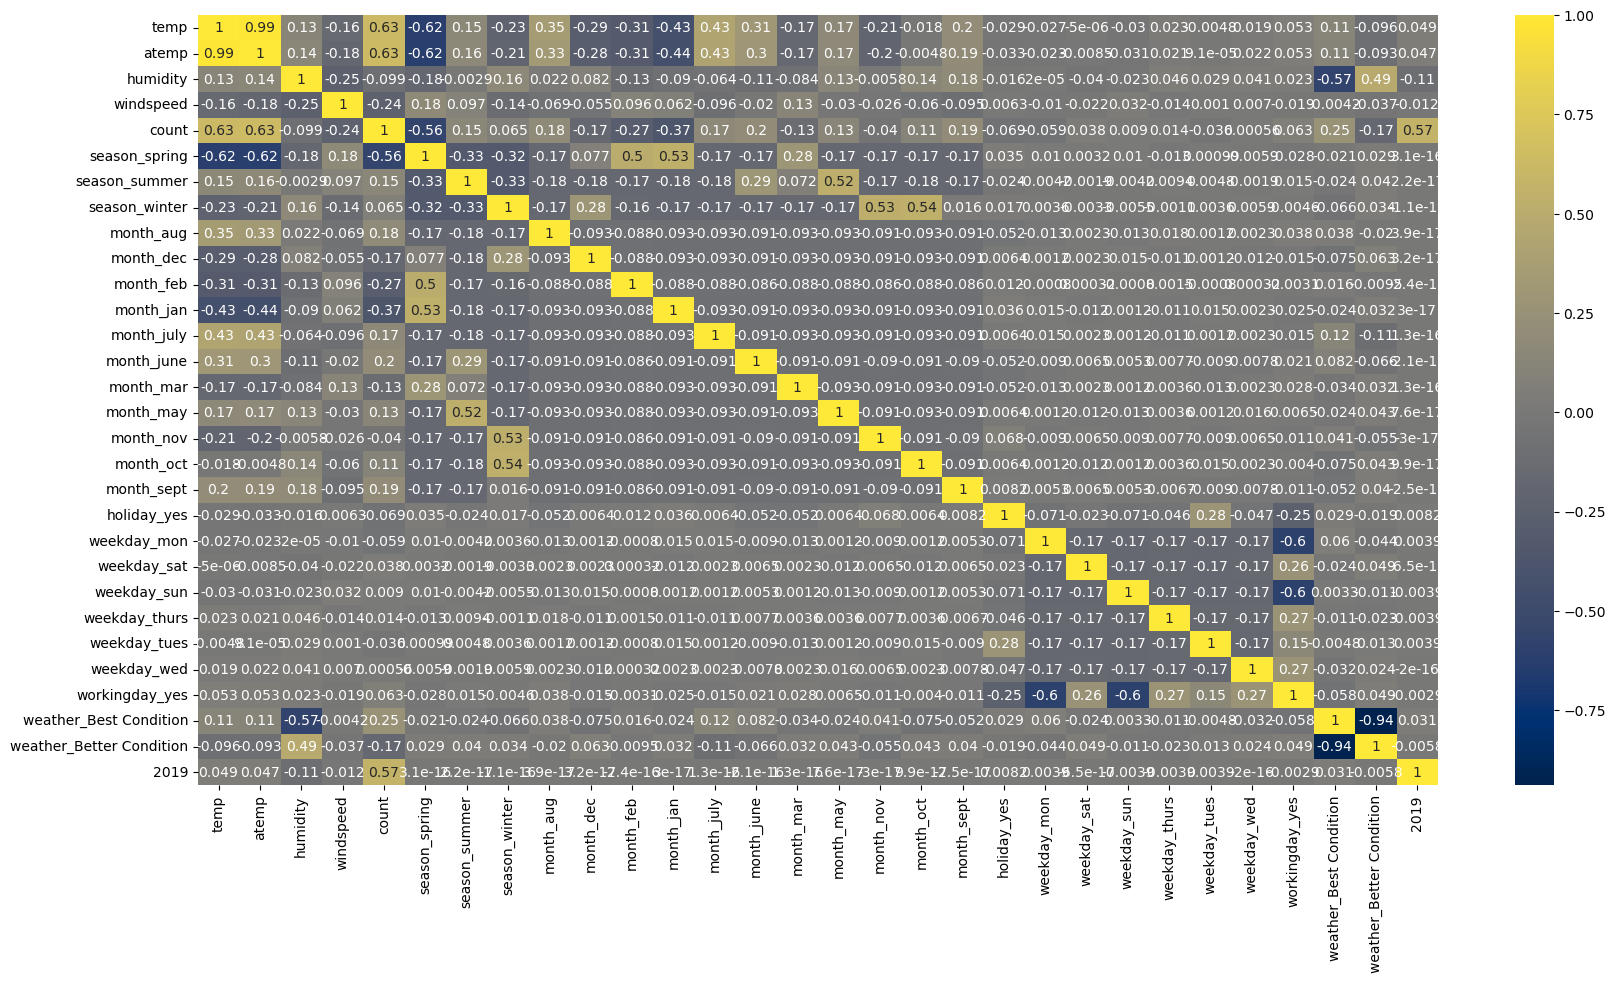

In [48]:
plt.figure(figsize=(20,10))
sns.heatmap(df_new.corr(),annot=True,cmap='cividis')
plt.show()

In [49]:
# correlation
a=df.corr()

In [50]:
abc=a['count'].drop('count')

In [51]:
for i in abc.index:
    print(f"{i} vs count: {abc[i]}")

instant vs count: 0.6298957243767757
season vs count: 0.4045837840885188
year vs count: 0.5697284652110445
month vs count: 0.278190929259247
holiday vs count: -0.06876375304749031
weekday vs count: 0.06753406337226267
workingday vs count: 0.06254174970317232
weather vs count: -0.2959286224242957
temp vs count: 0.6270440344135135
atemp vs count: 0.6306853489531029
humidity vs count: -0.09854287912248184
windspeed vs count: -0.23513249514103576
casual vs count: 0.6721234097443961
registered vs count: 0.94541061184837
weekend vs count: 0.024142244083388265


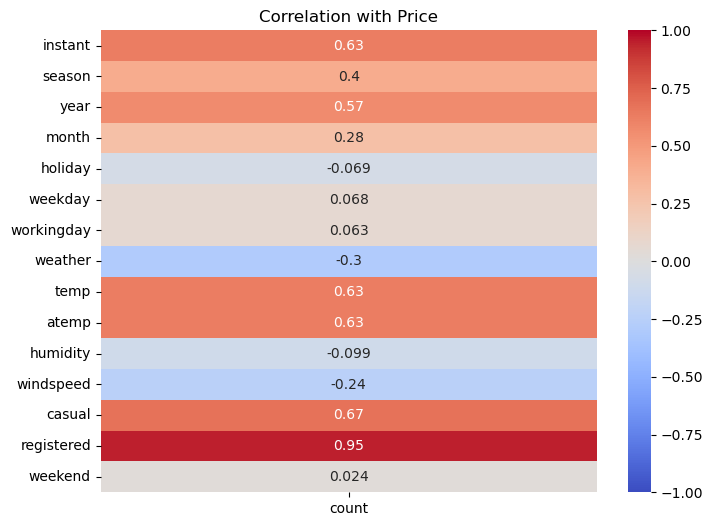

In [52]:
plt.figure(figsize=(8, 6))
sns.heatmap(abc.to_frame(), annot=True, cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Correlation with Price')
plt.show()


In [53]:
df.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count', 'weekend'],
      dtype='object')

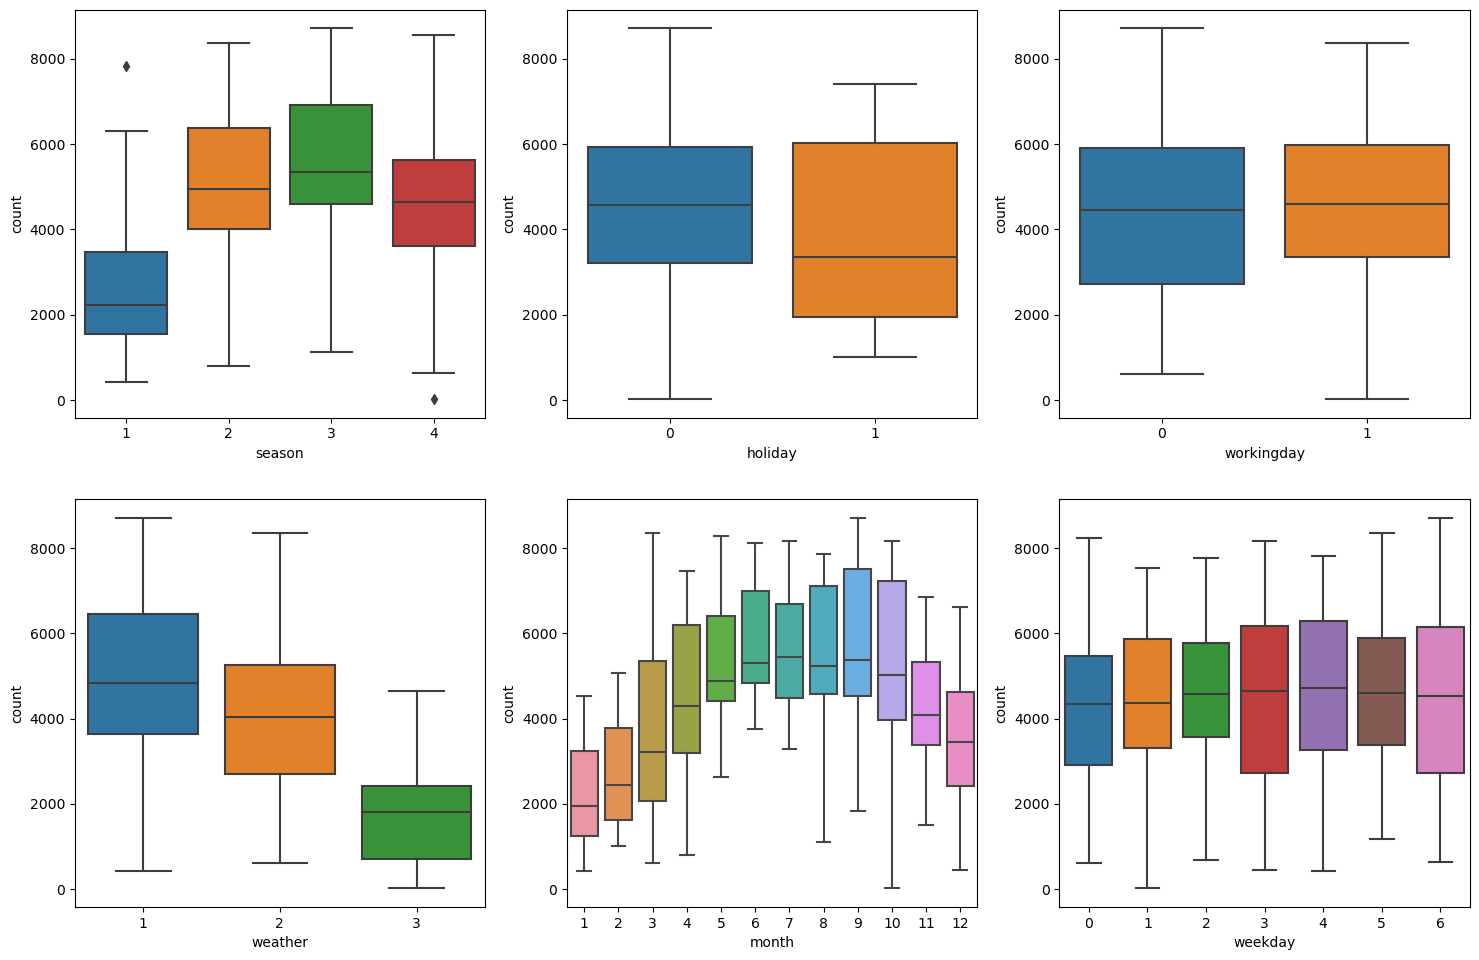

In [54]:
# plotting subplot
plt.figure(figsize=(18, 18))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'count', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'count', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'count', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weather', y = 'count', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'month', y = 'count', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'count', data = df)
plt.show()

<font color="black" style ="font-family:Cambria ;font-size:18px"><b>4. Train-Test Split:  </b></font><br>

- **WE HAVE TO PERFORM MANY THING WHILE TRAINING THE MODEL**
    - **OUR BASIC EQUATON IS <FONT COLOR='teal'>$ Y=MX+MX_1+MX_2,MX_3+.....MX_N +C$</FONT> HERE THE <FONT COLOR='teal'>$X_1,X_2,X_3...X_N$</FONT> ARE THE COLUMNS WHICH WE HAVE PREDICITED VARIABLE AND <FONT COLOR='teal'>$ M $</FONT> IS A SLOPE OF HAT EQUATION IN OUR TERMS IT IS <FONT COLOR='teal'>TARGET VARIBLE</FONT>**
    - **WE HAVE TO  CREATE A X_TRAIN AND Y_TRAIN FROM THE TRAINING DATA_SETS**
   

### <FONT COLOR='BROWN'>SPLLITING INTO TRAIN AND TEST SPLIT</FONT>
- **IMPORTING SKLEARN LIBARY FROM THAT LIBRARY WE ARE IMPORTING THE TRAIN TEST SPLIT**

In [55]:
df_new

,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,month_sept,holiday_yes,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,workingday_yes,weather_Best Condition,weather_Better Condition,2019
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,2114,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
726,10.386653,12.75230,59.0000,10.416557,3095,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1
727,10.386653,12.12000,75.2917,8.333661,1341,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
728,10.489153,11.58500,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1


In [56]:
df_new.columns=df_new.columns.astype(str)

In [57]:
df_new.rename(columns={'2019': 'Year'},inplace=True)

In [58]:
df_new

,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,month_sept,holiday_yes,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,workingday_yes,weather_Best Condition,weather_Better Condition,Year
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,2114,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
726,10.386653,12.75230,59.0000,10.416557,3095,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1
727,10.386653,12.12000,75.2917,8.333661,1341,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
728,10.489153,11.58500,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1


In [59]:
from sklearn.model_selection import train_test_split

In [60]:
# dividing data into train test sets
df_train,df_test=train_test_split(df_new,train_size=0.8,random_state=100)
print(df_train.shape)
print(df_test.shape)

(584, 30)
(146, 30)



<font color="brown" style ="font-family:Cambria ;font-size:20px"><b>Rescalling The Features</b></font><br>

- <font color="black" style ="font-family:Cambria ;font-size:18px"><b>Basically There Are 3 Steps  </b></font>
<br>

    - **FIT : THE MODEL IT LEARNS XMIN AND XMAX**
    - **TRANSFROM: IT<font color=red> $\frac{X-XMIN}{XMIN-XMAX}$</font>**
    - **FIT_TRANSFORM:**

In [61]:
# normalization 
scaler=MinMaxScaler()


In [62]:
df_train[['temp','atemp','humidity','windspeed','count']] =scaler.fit_transform(df_train[['temp','atemp','humidity','windspeed','count']])
df_train.head()

,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,month_sept,holiday_yes,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,workingday_yes,weather_Best Condition,weather_Better Condition,Year
367,0.113228,0.061963,0.454701,0.695175,0.254717,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1
648,0.468352,0.462175,0.477458,0.299450,0.868385,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
44,0.443431,0.419099,0.387290,0.807474,0.217556,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
705,0.326094,0.318824,0.787463,0.189819,0.573631,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1
379,0.133996,0.108365,0.431945,0.449210,0.263346,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1


In [63]:
df_train.iloc[97]

temp                        0.352054
atemp                       0.320482
humidity                    0.593387
windspeed                   0.565523
count                       0.348711
season_spring               0.000000
season_summer               0.000000
season_winter               1.000000
month_aug                   0.000000
month_dec                   0.000000
month_feb                   0.000000
month_jan                   0.000000
month_july                  0.000000
month_june                  0.000000
month_mar                   0.000000
month_may                   0.000000
month_nov                   1.000000
month_oct                   0.000000
month_sept                  0.000000
holiday_yes                 0.000000
weekday_mon                 0.000000
weekday_sat                 0.000000
weekday_sun                 0.000000
weekday_thurs               0.000000
weekday_tues                0.000000
weekday_wed                 0.000000
workingday_yes              1.000000
w

In [64]:
y_train=df_train.pop("count")
x_train=df_train

<font color="black" style ="font-family:Cambria ;font-size:18px"><b>5. Model Building:  </b></font><br>

In [65]:
x_train_sm=sm.add_constant(x_train)

# create the first model
lr=sm.OLS(y_train,x_train_sm)
# fitting the model
lr_model=lr.fit()

lr_model.params

const                       0.027430
temp                        0.382470
atemp                       0.068022
humidity                   -0.144362
windspeed                  -0.178924
season_spring              -0.056389
season_summer               0.041370
season_winter               0.108210
month_aug                   0.018583
month_dec                  -0.051926
month_feb                  -0.028666
month_jan                  -0.058708
month_july                 -0.033777
month_june                  0.010519
month_mar                   0.002937
month_may                   0.018936
month_nov                  -0.050210
month_oct                   0.013229
month_sept                  0.077910
holiday_yes                -0.049602
weekday_mon                -0.012488
weekday_sat                 0.010084
weekday_sun                 0.048061
weekday_thurs               0.002573
weekday_tues               -0.014654
weekday_wed                -0.013128
workingday_yes              0.041459
w

In [66]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     120.3
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          3.26e-215
Time:                        18:38:12   Log-Likelihood:                 613.26
No. Observations:                 584   AIC:                            -1169.
Df Residuals:                     555   BIC:                            -1042.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0274      0.041      0.674      0.501      -0.053       0.107
temp                         0.3825      0.135      2.828      0.005       0.117       0.648
atemp                        0.0680      0.133      0.510      0.610      -0.194       0.330
humidity                    -0.1444      0.036     -3.993      0.000      -0.215      -0.073
windspeed                   -0.1789      0.024     -7.352      0.000      -0.227      -0.131
season_spring               -0.0564      0.027     -2.068      0.039      -0.110      -0.003
season_summer                0.0414      0.024      1.719      0.086      -0.006       0.089
season_winter                0.1082      0.025      4.381      0.000       0.060       0.157
month_aug                    0.0186      0.031      0.599      0.550      -0.042       0.080
month_dec                   -0.0519      0.031     -1.690      0.092      -0.112       0.008
month_feb                   -0.0287      0.030     -0.945      0.345      -0.088       0.031
month_jan                   -0.0587      0.031     -1.875      0.061      -0.120       0.003
month_july                  -0.0338      0.032     -1.053      0.293      -0.097       0.029
month_june                   0.0105      0.023      0.467      0.641      -0.034       0.055
month_mar                    0.0029      0.023      0.125      0.900      -0.043       0.049
month_may                    0.0189      0.019      0.982      0.326      -0.019       0.057
month_nov                   -0.0502      0.033     -1.503      0.133      -0.116       0.015
month_oct                    0.0132      0.032      0.408      0.684      -0.050       0.077
month_sept                   0.0779      0.029      2.660      0.008       0.020       0.135
holiday_yes                 -0.0496      0.022     -2.232      0.026      -0.093      -0.006
weekday_mon                 -0.0125      0.014     -0.892      0.373      -0.040       0.015
weekday_sat                  0.0101      0.014      0.704      0.482      -0.018       0.038
weekday_sun                  0.0481      0.014      3.492      0.001       0.021       0.075
weekday_thurs                0.0026      0.013      0.191      0.849      -0.024       0.029
weekday_tues                -0.0147      0.014     -1.061      0.289      -0.042       0.012
weekday_wed                 -0.0131      0.014     -0.939      0.348      -0.041       0.014
workingday_yes               0.0415      0.013      3.292      0.001       0.017       0.066
weather_Best Condition       0.2625      0.025     10.458      0.000       0.213       0.312
weather_Better Condition     0.2034      0.024      8.558      0.000       0.157       0.250
Year                         0.2293      0.007     31.082      0.000       0.215       0.244
==============

<font color="brown" style ="font-family:Cambria ;font-size:16px">The `Variance Inflation Factor (VIF)` Is A Measure Used To Assess The Extent Of Multicollinearity In A Regression Analysis. `Multicollinearity Occurs` When Independent Variables In A Regression Model Are `Highly Correlated`, Which Can Lead To Issues In Estimating The Regression Coefficients And Their Interpretation. VIF Quantifies How Much The Variance Of An Estimated Regression Coefficient Is Increased Due To Multicollinearity.</font><br>

<font color = 'teal' font size ='3'>$VIF_i= \frac{1}{1-R_i^2}$ </font>

In [67]:
vif=pd.DataFrame()
vif["Feature"]=x_train.columns
vif["VIF"]=[variance_inflation_factor(x_train.values,i)for i in range(x_train.shape[1])]
vif["VIF"]=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Feature,VIF
25,workingday_yes,133.02
0,temp,71.81
1,atemp,61.58
19,weekday_mon,31.20
21,weekday_sun,30.09
26,weather_Best Condition,11.37
4,season_spring,10.84
27,weather_Better Condition,9.84
6,season_winter,8.86
5,season_summer,8.33


<font color="black" style ="font-family:Cambria ;font-size:18px"><b>Before Removing The Feaures We Have To Be Careful Which Column Should Remove So</b></font><br>

- <font color="brown" style ="font-family:Cambria ;font-size:18px"><b>We Could Have</b></font><br>
    - <font color= black >**1. High P Value - High Vif**</font>
    
    - **2. High - Low**
         - <font color= brown > **2.1 High P Value <-> Low Vif (Remove These First)**
      - <font color= brown > **2.2 Low P Value <-> High Vif (Remove These After The Ones Above)</font>**
         
    - **3.<font color= black > Low P Value - Low Vif** </font>

## MODEL 1 
<font color="brown" style ="font-family:Cambria ;font-size:18px"><b>High P Value & Low Vif</b></font><br>
- **The Column Which We Have Drop Has High P Value<0.05**
- **`month_mar` p value  is 0.911 and it's vif is 3.50**

<font color="black" style ="font-family:Cambria ;font-size:16px"><b>Examine The P-Values For Each Coefficient. Remove Variables With High P-Values (Typically Above 0.05) If They Are Not Contributing Significantly</b></font><br>

In [68]:
X=x_train.drop('month_mar',axis=1)

In [69]:
x_train_sm=sm.add_constant(X)
# create the first model
lr=sm.OLS(y_train,x_train_sm)
# fitting the model
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     125.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.91e-216
Time:                        18:38:12   Log-Likelihood:                 613.26
No. Observations:                 584   AIC:                            -1171.
Df Residuals:                     556   BIC:                            -1048.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0289      0.039      0.743      0.458      -0.048       0.105
temp                         0.3821      0.135      2.828      0.005       0.117       0.647
atemp                        0.0675      0.133      0.507      0.612      -0.194       0.329
humidity                    -0.1440      0.036     -3.999      0.000      -0.215      -0.073
windspeed                   -0.1791      0.024     -7.372      0.000      -0.227      -0.131
season_spring               -0.0553      0.026     -2.147      0.032      -0.106      -0.005
season_summer                0.0407      0.023      1.735      0.083      -0.005       0.087
season_winter                0.1088      0.024      4.501      0.000       0.061       0.156
month_aug                    0.0172      0.029      0.593      0.553      -0.040       0.074
month_dec                   -0.0545      0.023     -2.376      0.018      -0.100      -0.009
month_feb                   -0.0315      0.020     -1.576      0.116      -0.071       0.008
month_jan                   -0.0617      0.021     -2.990      0.003      -0.102      -0.021
month_july                  -0.0351      0.030     -1.156      0.248      -0.095       0.025
month_june                   0.0096      0.021      0.451      0.652      -0.032       0.051
month_may                    0.0181      0.018      1.001      0.317      -0.017       0.054
month_nov                   -0.0525      0.028     -1.890      0.059      -0.107       0.002
month_oct                    0.0110      0.027      0.405      0.685      -0.042       0.064
month_sept                   0.0763      0.026      2.910      0.004       0.025       0.128
holiday_yes                 -0.0492      0.022     -2.237      0.026      -0.092      -0.006
weekday_mon                 -0.0122      0.014     -0.885      0.377      -0.039       0.015
weekday_sat                  0.0100      0.014      0.701      0.484      -0.018       0.038
weekday_sun                  0.0485      0.013      3.618      0.000       0.022       0.075
weekday_thurs                0.0025      0.013      0.189      0.850      -0.024       0.029
weekday_tues                -0.0147      0.014     -1.065      0.287      -0.042       0.012
weekday_wed                 -0.0132      0.014     -0.943      0.346      -0.041       0.014
workingday_yes               0.0419      0.012      3.452      0.001       0.018       0.066
weather_Best Condition       0.2625      0.025     10.468      0.000       0.213       0.312
weather_Better Condition     0.2034      0.024      8.565      0.000       0.157       0.250
Year                         0.2293      0.007     31.110      0.000       0.215       0.244
==============================================================================
Omnibus:                    

In [70]:
# CREATING A DATA FRAME THAT WILL CONTAIN THE NAME OF THE FEATURES AND THEIR VIF VALUES
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
# rounding the values upto 2decimal point
vif['VIF']=round(vif['VIF'],2)
# arranging the vif values from big to small
vif=vif.sort_values(by='VIF',ascending =False)
vif

,Features,VIF
24,workingday_yes,121.16
0,temp,71.76
1,atemp,61.53
18,weekday_mon,28.78
20,weekday_sun,27.49
25,weather_Best Condition,11.37
26,weather_Better Condition,9.84
4,season_spring,9.68
6,season_winter,8.50
5,season_summer,7.93


## Model 2
<font color="brown" style ="font-family:Cambria ;font-size:18px"><b>High P Value & Low Vif</b></font><br>
- **`weekday_thurs` p value  is 0.862 and it's vif is 1.350**

In [71]:
X=X.drop('weekday_thurs',axis=1)

In [72]:
x_train_sm=sm.add_constant(X)
# create the first model
lr=sm.OLS(y_train,x_train_sm)
# fitting the model
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     130.1
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.57e-217
Time:                        18:38:13   Log-Likelihood:                 613.24
No. Observations:                 584   AIC:                            -1172.
Df Residuals:                     557   BIC:                            -1054.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0293      0.039      0.756      0.450      -0.047       0.106
temp                         0.3825      0.135      2.834      0.005       0.117       0.648
atemp                        0.0670      0.133      0.504      0.615      -0.194       0.328
humidity                    -0.1437      0.036     -3.998      0.000      -0.214      -0.073
windspeed                   -0.1790      0.024     -7.378      0.000      -0.227      -0.131
season_spring               -0.0552      0.026     -2.147      0.032      -0.106      -0.005
season_summer                0.0408      0.023      1.740      0.082      -0.005       0.087
season_winter                0.1089      0.024      4.507      0.000       0.061       0.156
month_aug                    0.0173      0.029      0.598      0.550      -0.040       0.074
month_dec                   -0.0545      0.023     -2.377      0.018      -0.099      -0.009
month_feb                   -0.0314      0.020     -1.571      0.117      -0.071       0.008
month_jan                   -0.0616      0.021     -2.990      0.003      -0.102      -0.021
month_july                  -0.0350      0.030     -1.154      0.249      -0.094       0.025
month_june                   0.0097      0.021      0.457      0.648      -0.032       0.051
month_may                    0.0181      0.018      1.003      0.316      -0.017       0.054
month_nov                   -0.0525      0.028     -1.891      0.059      -0.107       0.002
month_oct                    0.0111      0.027      0.410      0.682      -0.042       0.064
month_sept                   0.0763      0.026      2.915      0.004       0.025       0.128
holiday_yes                 -0.0485      0.022     -2.240      0.026      -0.091      -0.006
weekday_mon                 -0.0127      0.013     -0.947      0.344      -0.039       0.014
weekday_sat                  0.0087      0.012      0.701      0.484      -0.016       0.033
weekday_sun                  0.0479      0.013      3.667      0.000       0.022       0.074
weekday_tues                -0.0160      0.012     -1.358      0.175      -0.039       0.007
weekday_wed                 -0.0145      0.012     -1.214      0.225      -0.038       0.009
workingday_yes               0.0427      0.011      3.763      0.000       0.020       0.065
weather_Best Condition       0.2624      0.025     10.476      0.000       0.213       0.312
weather_Better Condition     0.2032      0.024      8.571      0.000       0.157       0.250
Year                         0.2293      0.007     31.137      0.000       0.215       0.244
==============================================================================
Omnibus:                      106.856   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Ja

In [73]:
# CREATING A DATA FRAME THAT WILL CONTAIN THE NAME OF THE FEATURES AND THEIR VIF VALUES
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
# rounding the values upto 2decimal point
vif['VIF']=round(vif['VIF'],2)
# arranging the vif values from big to small
vif=vif.sort_values(by='VIF',ascending =False)
vif

,Features,VIF
23,workingday_yes,118.94
0,temp,71.74
1,atemp,61.50
18,weekday_mon,28.77
20,weekday_sun,27.49
24,weather_Best Condition,11.36
25,weather_Better Condition,9.84
4,season_spring,9.68
6,season_winter,8.50
5,season_summer,7.93


## Model 3
<font color="brown" style ="font-family:Cambria ;font-size:18px"><b>High P Value & Low Vif</b></font><br>
- **`weekday_wed` p value  is 0.717 and it's vif is 1.20**

In [74]:
X=X.drop('month_oct',axis=1)

In [75]:
x_train_sm=sm.add_constant(X)
# create the first model
lr=sm.OLS(y_train,x_train_sm)
# fitting the model
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     135.5
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.38e-218
Time:                        18:38:13   Log-Likelihood:                 613.15
No. Observations:                 584   AIC:                            -1174.
Df Residuals:                     558   BIC:                            -1061.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0325      0.038      0.857      0.392      -0.042       0.107
temp                         0.3840      0.135      2.848      0.005       0.119       0.649
atemp                        0.0665      0.133      0.500      0.617      -0.195       0.328
humidity                    -0.1426      0.036     -3.981      0.000      -0.213      -0.072
windspeed                   -0.1790      0.024     -7.382      0.000      -0.227      -0.131
season_spring               -0.0573      0.025     -2.276      0.023      -0.107      -0.008
season_summer                0.0370      0.022      1.718      0.086      -0.005       0.079
season_winter                0.1133      0.022      5.243      0.000       0.071       0.156
month_aug                    0.0126      0.027      0.474      0.636      -0.040       0.065
month_dec                   -0.0609      0.017     -3.659      0.000      -0.094      -0.028
month_feb                   -0.0335      0.019     -1.736      0.083      -0.071       0.004
month_jan                   -0.0636      0.020     -3.184      0.002      -0.103      -0.024
month_july                  -0.0398      0.028     -1.424      0.155      -0.095       0.015
month_june                   0.0076      0.021      0.368      0.713      -0.033       0.048
month_may                    0.0172      0.018      0.962      0.337      -0.018       0.052
month_nov                   -0.0613      0.018     -3.499      0.001      -0.096      -0.027
month_sept                   0.0704      0.022      3.221      0.001       0.027       0.113
holiday_yes                 -0.0471      0.021     -2.204      0.028      -0.089      -0.005
weekday_mon                 -0.0121      0.013     -0.904      0.366      -0.038       0.014
weekday_sat                  0.0087      0.012      0.702      0.483      -0.016       0.033
weekday_sun                  0.0485      0.013      3.738      0.000       0.023       0.074
weekday_tues                -0.0161      0.012     -1.365      0.173      -0.039       0.007
weekday_wed                 -0.0144      0.012     -1.208      0.227      -0.038       0.009
workingday_yes               0.0432      0.011      3.835      0.000       0.021       0.065
weather_Best Condition       0.2618      0.025     10.477      0.000       0.213       0.311
weather_Better Condition     0.2026      0.024      8.568      0.000       0.156       0.249
Year                         0.2293      0.007     31.158      0.000       0.215       0.244
==============================================================================
Omnibus:                      105.365   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.268
Skew:                          -0.880   Prob(JB):       

In [76]:
# CREATING A DATA FRAME THAT WILL CONTAIN THE NAME OF THE FEATURES AND THEIR VIF VALUES
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
# rounding the values upto 2decimal point
vif['VIF']=round(vif['VIF'],2)
# arranging the vif values from big to small
vif=vif.sort_values(by='VIF',ascending =False)
vif

,Features,VIF
22,workingday_yes,114.67
0,temp,71.69
1,atemp,61.50
17,weekday_mon,27.71
19,weekday_sun,26.49
23,weather_Best Condition,11.33
24,weather_Better Condition,9.80
4,season_spring,9.30
6,season_winter,6.81
5,season_summer,6.70


## Model 4 
<font color="brown" style ="font-family:Cambria ;font-size:18px"><b>High Vif</b></font><br>
- `workingday_yes` 114.67

In [77]:
X=X.drop('workingday_yes',axis=1)

In [78]:
x_train_sm=sm.add_constant(X)
# create the first model
lr=sm.OLS(y_train,x_train_sm)
# fitting the model
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     135.5
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.38e-218
Time:                        18:38:13   Log-Likelihood:                 613.15
No. Observations:                 584   AIC:                            -1174.
Df Residuals:                     558   BIC:                            -1061.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0757      0.047      1.612      0.107      -0.017       0.168
temp                         0.3840      0.135      2.848      0.005       0.119       0.649
atemp                        0.0665      0.133      0.500      0.617      -0.195       0.328
humidity                    -0.1426      0.036     -3.981      0.000      -0.213      -0.072
windspeed                   -0.1790      0.024     -7.382      0.000      -0.227      -0.131
season_spring               -0.0573      0.025     -2.276      0.023      -0.107      -0.008
season_summer                0.0370      0.022      1.718      0.086      -0.005       0.079
season_winter                0.1133      0.022      5.243      0.000       0.071       0.156
month_aug                    0.0126      0.027      0.474      0.636      -0.040       0.065
month_dec                   -0.0609      0.017     -3.659      0.000      -0.094      -0.028
month_feb                   -0.0335      0.019     -1.736      0.083      -0.071       0.004
month_jan                   -0.0636      0.020     -3.184      0.002      -0.103      -0.024
month_july                  -0.0398      0.028     -1.424      0.155      -0.095       0.015
month_june                   0.0076      0.021      0.368      0.713      -0.033       0.048
month_may                    0.0172      0.018      0.962      0.337      -0.018       0.052
month_nov                   -0.0613      0.018     -3.499      0.001      -0.096      -0.027
month_sept                   0.0704      0.022      3.221      0.001       0.027       0.113
holiday_yes                 -0.0903      0.023     -3.892      0.000      -0.136      -0.045
weekday_mon                 -0.0553      0.011     -4.833      0.000      -0.078      -0.033
weekday_sat                  0.0087      0.012      0.702      0.483      -0.016       0.033
weekday_sun                  0.0053      0.011      0.461      0.645      -0.017       0.028
weekday_tues                -0.0161      0.012     -1.365      0.173      -0.039       0.007
weekday_wed                 -0.0144      0.012     -1.208      0.227      -0.038       0.009
weather_Best Condition       0.2618      0.025     10.477      0.000       0.213       0.311
weather_Better Condition     0.2026      0.024      8.568      0.000       0.156       0.249
Year                         0.2293      0.007     31.158      0.000       0.215       0.244
==============================================================================
Omnibus:                      105.365   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.268
Skew:                          -0.880   Prob(JB):                     1.71e-65
Kurtosis:                       6.026   Cond. No.                     

In [79]:
# CREATING A DATA FRAME THAT WILL CONTAIN THE NAME OF THE FEATURES AND THEIR VIF VALUES
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
# rounding the values upto 2decimal point
vif['VIF']=round(vif['VIF'],2)
# arranging the vif values from big to small
vif=vif.sort_values(by='VIF',ascending =False)
vif

,Features,VIF
0,temp,472.19
1,atemp,422.97
2,humidity,29.50
22,weather_Best Condition,18.91
23,weather_Better Condition,10.88
4,season_spring,9.97
6,season_winter,7.65
5,season_summer,7.27
3,windspeed,5.20
7,month_aug,4.75


## Model 5
<font color="brown" style ="font-family:Cambria ;font-size:18px"><b>High P Value & Low Vif</b></font><br>
- **`month_june` p value  is 0.713 and it's vif is 2.54**


In [80]:
X=X.drop('month_june',axis=1)

In [81]:
x_train_sm=sm.add_constant(X)
# create the first model
lr=sm.OLS(y_train,x_train_sm)
# fitting the model
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     141.3
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.12e-219
Time:                        18:38:14   Log-Likelihood:                 613.08
No. Observations:                 584   AIC:                            -1176.
Df Residuals:                     559   BIC:                            -1067.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0765      0.047      1.632      0.103      -0.016       0.169
temp                         0.3980      0.129      3.080      0.002       0.144       0.652
atemp                        0.0602      0.132      0.457      0.648      -0.199       0.319
humidity                    -0.1445      0.035     -4.082      0.000      -0.214      -0.075
windspeed                   -0.1804      0.024     -7.533      0.000      -0.227      -0.133
season_spring               -0.0595      0.024     -2.434      0.015      -0.108      -0.011
season_summer                0.0360      0.021      1.687      0.092      -0.006       0.078
season_winter                0.1107      0.020      5.418      0.000       0.071       0.151
month_aug                    0.0071      0.022      0.323      0.747      -0.036       0.050
month_dec                   -0.0600      0.016     -3.649      0.000      -0.092      -0.028
month_feb                   -0.0326      0.019     -1.704      0.089      -0.070       0.005
month_jan                   -0.0621      0.020     -3.180      0.002      -0.100      -0.024
month_july                  -0.0457      0.023     -2.009      0.045      -0.090      -0.001
month_may                    0.0141      0.016      0.895      0.371      -0.017       0.045
month_nov                   -0.0607      0.017     -3.483      0.001      -0.095      -0.026
month_sept                   0.0667      0.019      3.455      0.001       0.029       0.105
holiday_yes                 -0.0909      0.023     -3.929      0.000      -0.136      -0.045
weekday_mon                 -0.0551      0.011     -4.825      0.000      -0.077      -0.033
weekday_sat                  0.0087      0.012      0.707      0.480      -0.016       0.033
weekday_sun                  0.0055      0.011      0.478      0.633      -0.017       0.028
weekday_tues                -0.0160      0.012     -1.359      0.175      -0.039       0.007
weekday_wed                 -0.0145      0.012     -1.214      0.225      -0.038       0.009
weather_Best Condition       0.2616      0.025     10.480      0.000       0.213       0.311
weather_Better Condition     0.2026      0.024      8.574      0.000       0.156       0.249
Year                         0.2290      0.007     31.262      0.000       0.215       0.243
==============================================================================
Omnibus:                      104.514   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.164
Skew:                          -0.877   Prob(JB):                     3.61e-64
Kurtosis:                       5.988   Cond. No.                         92.0
==============================================================================

Note

In [82]:
# CREATING A DATA FRAME THAT WILL CONTAIN THE NAME OF THE FEATURES AND THEIR VIF VALUES
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
# rounding the values upto 2decimal point
vif['VIF']=round(vif['VIF'],2)
# arranging the vif values from big to small
vif=vif.sort_values(by='VIF',ascending =False)
vif

,Features,VIF
0,temp,432.05
1,atemp,415.68
2,humidity,28.86
21,weather_Best Condition,18.90
22,weather_Better Condition,10.88
4,season_spring,9.39
5,season_summer,7.18
6,season_winter,6.80
3,windspeed,5.09
7,month_aug,3.23


## Model 6
<font color="brown" style ="font-family:Cambria ;font-size:18px"><b>High P Value & Low Vif</b></font><br>
- **`month_aug` p value  is 0.747 and it's vif is 3.23**

In [83]:
X=X.drop('month_aug',axis=1)

In [84]:
x_train_sm=sm.add_constant(X)
# create the first model
lr=sm.OLS(y_train,x_train_sm)
# fitting the model
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     147.7
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.81e-220
Time:                        18:38:14   Log-Likelihood:                 613.02
No. Observations:                 584   AIC:                            -1178.
Df Residuals:                     560   BIC:                            -1073.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0799      0.046      1.751      0.081      -0.010       0.170
temp                         0.4018      0.129      3.125      0.002       0.149       0.654
atemp                        0.0572      0.131      0.436      0.663      -0.201       0.315
humidity                    -0.1440      0.035     -4.074      0.000      -0.213      -0.075
windspeed                   -0.1805      0.024     -7.543      0.000      -0.227      -0.133
season_spring               -0.0639      0.020     -3.135      0.002      -0.104      -0.024
season_summer                0.0314      0.016      1.993      0.047       0.000       0.062
season_winter                0.1067      0.016      6.619      0.000       0.075       0.138
month_dec                   -0.0603      0.016     -3.677      0.000      -0.092      -0.028
month_feb                   -0.0326      0.019     -1.708      0.088      -0.070       0.005
month_jan                   -0.0621      0.020     -3.183      0.002      -0.100      -0.024
month_july                  -0.0507      0.017     -3.026      0.003      -0.084      -0.018
month_may                    0.0139      0.016      0.886      0.376      -0.017       0.045
month_nov                   -0.0611      0.017     -3.520      0.000      -0.095      -0.027
month_sept                   0.0628      0.015      4.127      0.000       0.033       0.093
holiday_yes                 -0.0910      0.023     -3.940      0.000      -0.136      -0.046
weekday_mon                 -0.0550      0.011     -4.825      0.000      -0.077      -0.033
weekday_sat                  0.0088      0.012      0.717      0.474      -0.015       0.033
weekday_sun                  0.0055      0.011      0.484      0.629      -0.017       0.028
weekday_tues                -0.0160      0.012     -1.362      0.174      -0.039       0.007
weekday_wed                 -0.0145      0.012     -1.211      0.226      -0.038       0.009
weather_Best Condition       0.2620      0.025     10.516      0.000       0.213       0.311
weather_Better Condition     0.2031      0.024      8.617      0.000       0.157       0.249
Year                         0.2291      0.007     31.304      0.000       0.215       0.243
==============================================================================
Omnibus:                      105.099   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.130
Skew:                          -0.882   Prob(JB):                     1.35e-64
Kurtosis:                       5.996   Cond. No.                         91.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified

In [85]:
# CREATING A DATA FRAME THAT WILL CONTAIN THE NAME OF THE FEATURES AND THEIR VIF VALUES
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
# rounding the values upto 2decimal point
vif['VIF']=round(vif['VIF'],2)
# arranging the vif values from big to small
vif=vif.sort_values(by='VIF',ascending =False)
vif

,Features,VIF
0,temp,424.92
1,atemp,412.79
2,humidity,27.46
20,weather_Best Condition,17.77
21,weather_Better Condition,10.37
4,season_spring,6.87
3,windspeed,5.06
6,season_winter,4.46
5,season_summer,4.08
9,month_jan,2.53


## Model 7
<font color="brown" style ="font-family:Cambria ;font-size:18px"><b>High P Value & High Vif</b></font><br>
- **`atemp` p value  is 0.663 and it's vif is 412**	


In [86]:
X=X.drop('atemp',axis=1)

In [87]:
x_train_sm=sm.add_constant(X)
# create the first model
lr=sm.OLS(y_train,x_train_sm)
# fitting the model
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     154.6
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.58e-221
Time:                        18:38:15   Log-Likelihood:                 612.92
No. Observations:                 584   AIC:                            -1180.
Df Residuals:                     561   BIC:                            -1079.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0787      0.046      1.728      0.085      -0.011       0.168
temp                         0.4557      0.035     12.972      0.000       0.387       0.525
humidity                    -0.1431      0.035     -4.059      0.000      -0.212      -0.074
windspeed                   -0.1826      0.023     -7.798      0.000      -0.229      -0.137
season_spring               -0.0627      0.020     -3.107      0.002      -0.102      -0.023
season_summer                0.0327      0.015      2.112      0.035       0.002       0.063
season_winter                0.1080      0.016      6.822      0.000       0.077       0.139
month_dec                   -0.0602      0.016     -3.676      0.000      -0.092      -0.028
month_feb                   -0.0326      0.019     -1.709      0.088      -0.070       0.005
month_jan                   -0.0624      0.019     -3.205      0.001      -0.101      -0.024
month_july                  -0.0502      0.017     -3.005      0.003      -0.083      -0.017
month_may                    0.0137      0.016      0.872      0.384      -0.017       0.045
month_nov                   -0.0611      0.017     -3.519      0.000      -0.095      -0.027
month_sept                   0.0632      0.015      4.162      0.000       0.033       0.093
holiday_yes                 -0.0916      0.023     -3.973      0.000      -0.137      -0.046
weekday_mon                 -0.0551      0.011     -4.833      0.000      -0.077      -0.033
weekday_sat                  0.0084      0.012      0.684      0.494      -0.016       0.033
weekday_sun                  0.0055      0.011      0.480      0.632      -0.017       0.028
weekday_tues                -0.0159      0.012     -1.348      0.178      -0.039       0.007
weekday_wed                 -0.0144      0.012     -1.208      0.228      -0.038       0.009
weather_Best Condition       0.2630      0.025     10.603      0.000       0.214       0.312
weather_Better Condition     0.2039      0.023      8.687      0.000       0.158       0.250
Year                         0.2290      0.007     31.328      0.000       0.215       0.243
==============================================================================
Omnibus:                      104.182   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.185
Skew:                          -0.875   Prob(JB):                     5.89e-64
Kurtosis:                       5.984   Cond. No.                         28.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
# CREATING A DATA FRAME THAT WILL CONTAIN THE NAME OF THE FEATURES AND THEIR VIF VALUES
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
# rounding the values upto 2decimal point
vif['VIF']=round(vif['VIF'],2)
# arranging the vif values from big to small
vif=vif.sort_values(by='VIF',ascending =False)
vif

,Features,VIF
1,humidity,27.44
0,temp,27.18
19,weather_Best Condition,17.70
20,weather_Better Condition,10.34
3,season_spring,6.78
2,windspeed,4.77
5,season_winter,4.32
4,season_summer,3.95
8,month_jan,2.52
21,Year,2.13


## Model 8
<font color="brown" style ="font-family:Cambria ;font-size:18px"><b>High P Value & Low Vif</b></font><br>
- **`weekday_sun` p value  is 0.632 and it's vif is 1.53**

In [89]:
X=X.drop('weekday_sun',axis=1)

In [90]:
x_train_sm=sm.add_constant(X)
# create the first model
lr=sm.OLS(y_train,x_train_sm)
# fitting the model
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     162.2
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.38e-222
Time:                        18:38:15   Log-Likelihood:                 612.80
No. Observations:                 584   AIC:                            -1182.
Df Residuals:                     562   BIC:                            -1085.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0805      0.045      1.775      0.076      -0.009       0.170
temp                         0.4551      0.035     12.972      0.000       0.386       0.524
humidity                    -0.1433      0.035     -4.067      0.000      -0.212      -0.074
windspeed                   -0.1820      0.023     -7.789      0.000      -0.228      -0.136
season_spring               -0.0629      0.020     -3.120      0.002      -0.103      -0.023
season_summer                0.0326      0.015      2.109      0.035       0.002       0.063
season_winter                0.1080      0.016      6.827      0.000       0.077       0.139
month_dec                   -0.0602      0.016     -3.677      0.000      -0.092      -0.028
month_feb                   -0.0326      0.019     -1.710      0.088      -0.070       0.005
month_jan                   -0.0624      0.019     -3.207      0.001      -0.101      -0.024
month_july                  -0.0499      0.017     -2.992      0.003      -0.083      -0.017
month_may                    0.0135      0.016      0.858      0.391      -0.017       0.044
month_nov                   -0.0614      0.017     -3.540      0.000      -0.095      -0.027
month_sept                   0.0632      0.015      4.167      0.000       0.033       0.093
holiday_yes                 -0.0920      0.023     -3.995      0.000      -0.137      -0.047
weekday_mon                 -0.0570      0.011     -5.339      0.000      -0.078      -0.036
weekday_sat                  0.0065      0.012      0.558      0.577      -0.016       0.029
weekday_tues                -0.0177      0.011     -1.597      0.111      -0.040       0.004
weekday_wed                 -0.0163      0.011     -1.449      0.148      -0.038       0.006
weather_Best Condition       0.2635      0.025     10.638      0.000       0.215       0.312
weather_Better Condition     0.2045      0.023      8.729      0.000       0.158       0.251
Year                         0.2288      0.007     31.361      0.000       0.215       0.243
==============================================================================
Omnibus:                      102.295   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.704
Skew:                          -0.857   Prob(JB):                     3.36e-63
Kurtosis:                       5.981   Cond. No.                         28.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
# CREATING A DATA FRAME THAT WILL CONTAIN THE NAME OF THE FEATURES AND THEIR VIF VALUES
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
# rounding the values upto 2decimal point
vif['VIF']=round(vif['VIF'],2)
# arranging the vif values from big to small
vif=vif.sort_values(by='VIF',ascending =False)
vif

,Features,VIF
1,humidity,27.38
0,temp,27.18
18,weather_Best Condition,17.44
19,weather_Better Condition,10.20
3,season_spring,6.78
2,windspeed,4.73
5,season_winter,4.32
4,season_summer,3.95
8,month_jan,2.52
20,Year,2.13


## Model 9
<font color="brown" style ="font-family:Cambria ;font-size:18px"><b>High P Value & Low Vif</b></font><br>
- **`weekday_sat` p value  is 0.577 and it's vif is 1.30**


In [92]:
X=X.drop('weekday_sat',axis=1)

In [93]:
x_train_sm=sm.add_constant(X)
# create the first model
lr=sm.OLS(y_train,x_train_sm)
# fitting the model
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     170.5
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.21e-223
Time:                        18:38:15   Log-Likelihood:                 612.64
No. Observations:                 584   AIC:                            -1183.
Df Residuals:                     563   BIC:                            -1092.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0816      0.045      1.803      0.072      -0.007       0.171
temp                         0.4548      0.035     12.973      0.000       0.386       0.524
humidity                    -0.1437      0.035     -4.083      0.000      -0.213      -0.075
windspeed                   -0.1821      0.023     -7.799      0.000      -0.228      -0.136
season_spring               -0.0632      0.020     -3.138      0.002      -0.103      -0.024
season_summer                0.0323      0.015      2.093      0.037       0.002       0.063
season_winter                0.1078      0.016      6.822      0.000       0.077       0.139
month_dec                   -0.0600      0.016     -3.671      0.000      -0.092      -0.028
month_feb                   -0.0325      0.019     -1.707      0.088      -0.070       0.005
month_jan                   -0.0625      0.019     -3.211      0.001      -0.101      -0.024
month_july                  -0.0497      0.017     -2.981      0.003      -0.082      -0.017
month_may                    0.0135      0.016      0.864      0.388      -0.017       0.044
month_nov                   -0.0616      0.017     -3.557      0.000      -0.096      -0.028
month_sept                   0.0631      0.015      4.160      0.000       0.033       0.093
holiday_yes                 -0.0919      0.023     -3.993      0.000      -0.137      -0.047
weekday_mon                 -0.0584      0.010     -5.639      0.000      -0.079      -0.038
weekday_tues                -0.0192      0.011     -1.776      0.076      -0.040       0.002
weekday_wed                 -0.0177      0.011     -1.621      0.105      -0.039       0.004
weather_Best Condition       0.2644      0.025     10.704      0.000       0.216       0.313
weather_Better Condition     0.2057      0.023      8.825      0.000       0.160       0.252
Year                         0.2287      0.007     31.376      0.000       0.214       0.243
==============================================================================
Omnibus:                      102.185   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.489
Skew:                          -0.857   Prob(JB):                     6.16e-63
Kurtosis:                       5.972   Cond. No.                         28.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
# CREATING A DATA FRAME THAT WILL CONTAIN THE NAME OF THE FEATURES AND THEIR VIF VALUES
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
# rounding the values upto 2decimal point
vif['VIF']=round(vif['VIF'],2)
# arranging the vif values from big to small
vif=vif.sort_values(by='VIF',ascending =False)
vif

,Features,VIF
1,humidity,27.38
0,temp,27.18
17,weather_Best Condition,17.17
18,weather_Better Condition,10.00
3,season_spring,6.78
2,windspeed,4.73
5,season_winter,4.32
4,season_summer,3.95
8,month_jan,2.52
19,Year,2.13


## Model 10
<font color="brown" style ="font-family:Cambria ;font-size:18px"><b>High P Value & Low Vif</b></font><br>
- **`month_may` p value  is 0.388 and it's vif is 1.62**


In [95]:
X=X.drop('month_may',axis=1)

In [96]:
x_train_sm=sm.add_constant(X)
# create the first model
lr=sm.OLS(y_train,x_train_sm)
# fitting the model
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     179.5
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          1.30e-224
Time:                        18:38:16   Log-Likelihood:                 612.26
No. Observations:                 584   AIC:                            -1185.
Df Residuals:                     564   BIC:                            -1097.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0741      0.044      1.669      0.096      -0.013       0.161
temp                         0.4601      0.035     13.333      0.000       0.392       0.528
humidity                    -0.1396      0.035     -4.004      0.000      -0.208      -0.071
windspeed                   -0.1830      0.023     -7.848      0.000      -0.229      -0.137
season_spring               -0.0610      0.020     -3.052      0.002      -0.100      -0.022
season_summer                0.0382      0.014      2.764      0.006       0.011       0.065
season_winter                0.1090      0.016      6.923      0.000       0.078       0.140
month_dec                   -0.0592      0.016     -3.627      0.000      -0.091      -0.027
month_feb                   -0.0318      0.019     -1.670      0.095      -0.069       0.006
month_jan                   -0.0614      0.019     -3.163      0.002      -0.099      -0.023
month_july                  -0.0500      0.017     -3.000      0.003      -0.083      -0.017
month_nov                   -0.0606      0.017     -3.506      0.000      -0.094      -0.027
month_sept                   0.0630      0.015      4.158      0.000       0.033       0.093
holiday_yes                 -0.0922      0.023     -4.010      0.000      -0.137      -0.047
weekday_mon                 -0.0586      0.010     -5.657      0.000      -0.079      -0.038
weekday_tues                -0.0192      0.011     -1.782      0.075      -0.040       0.002
weekday_wed                 -0.0175      0.011     -1.602      0.110      -0.039       0.004
weather_Best Condition       0.2655      0.025     10.771      0.000       0.217       0.314
weather_Better Condition     0.2066      0.023      8.874      0.000       0.161       0.252
Year                         0.2284      0.007     31.377      0.000       0.214       0.243
==============================================================================
Omnibus:                      101.044   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.340
Skew:                          -0.858   Prob(JB):                     1.62e-60
Kurtosis:                       5.894   Cond. No.                         27.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
# CREATING A DATA FRAME THAT WILL CONTAIN THE NAME OF THE FEATURES AND THEIR VIF VALUES
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
# rounding the values upto 2decimal point
vif['VIF']=round(vif['VIF'],2)
# arranging the vif values from big to small
vif=vif.sort_values(by='VIF',ascending =False)
vif

,Features,VIF
1,humidity,27.36
0,temp,26.86
16,weather_Best Condition,17.01
17,weather_Better Condition,9.94
3,season_spring,6.75
2,windspeed,4.65
5,season_winter,4.31
4,season_summer,3.29
8,month_jan,2.52
18,Year,2.12


## Model 11

<font color="brown" style ="font-family:Cambria ;font-size:18px"><b>High P Value & Low Vif</b></font><br>

- **`weekday_wed` p value  is 0.110 and it's vif is 1.25**


In [98]:
X=X.drop('weekday_wed',axis=1)

In [99]:
x_train_sm=sm.add_constant(X)
# create the first model
lr=sm.OLS(y_train,x_train_sm)
# fitting the model
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     188.8
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          3.32e-225
Time:                        18:38:16   Log-Likelihood:                 610.93
No. Observations:                 584   AIC:                            -1184.
Df Residuals:                     565   BIC:                            -1101.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0755      0.044      1.698      0.090      -0.012       0.163
temp                         0.4604      0.035     13.322      0.000       0.392       0.528
humidity                    -0.1428      0.035     -4.097      0.000      -0.211      -0.074
windspeed                   -0.1835      0.023     -7.857      0.000      -0.229      -0.138
season_spring               -0.0609      0.020     -3.045      0.002      -0.100      -0.022
season_summer                0.0379      0.014      2.734      0.006       0.011       0.065
season_winter                0.1082      0.016      6.869      0.000       0.077       0.139
month_dec                   -0.0583      0.016     -3.567      0.000      -0.090      -0.026
month_feb                   -0.0329      0.019     -1.727      0.085      -0.070       0.005
month_jan                   -0.0616      0.019     -3.170      0.002      -0.100      -0.023
month_july                  -0.0508      0.017     -3.046      0.002      -0.084      -0.018
month_nov                   -0.0604      0.017     -3.491      0.001      -0.094      -0.026
month_sept                   0.0637      0.015      4.199      0.000       0.034       0.094
holiday_yes                 -0.0924      0.023     -4.010      0.000      -0.138      -0.047
weekday_mon                 -0.0551      0.010     -5.434      0.000      -0.075      -0.035
weekday_tues                -0.0158      0.011     -1.490      0.137      -0.037       0.005
weather_Best Condition       0.2630      0.025     10.675      0.000       0.215       0.311
weather_Better Condition     0.2043      0.023      8.781      0.000       0.159       0.250
Year                         0.2284      0.007     31.323      0.000       0.214       0.243
==============================================================================
Omnibus:                      100.311   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.936
Skew:                          -0.840   Prob(JB):                     3.64e-62
Kurtosis:                       5.967   Cond. No.                         27.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
# CREATING A DATA FRAME THAT WILL CONTAIN THE NAME OF THE FEATURES AND THEIR VIF VALUES
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
# rounding the values upto 2decimal point
vif['VIF']=round(vif['VIF'],2)
# arranging the vif values from big to small
vif=vif.sort_values(by='VIF',ascending =False)
vif

,Features,VIF
1,humidity,27.27
0,temp,26.86
15,weather_Best Condition,16.93
16,weather_Better Condition,9.90
3,season_spring,6.75
2,windspeed,4.65
5,season_winter,4.31
4,season_summer,3.29
8,month_jan,2.52
17,Year,2.12


## Model 12
<font color="brown" style ="font-family:Cambria ;font-size:18px"><b>High P Value & Low Vif</b></font><br>

- **`weekday_tues` p value  is 0.137 and it's vif is 1.30**


In [101]:
X=X.drop('weekday_tues',axis=1)

In [102]:
x_train_sm=sm.add_constant(X)
# create the first model
lr=sm.OLS(y_train,x_train_sm)
# fitting the model
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     199.4
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          6.98e-226
Time:                        18:38:16   Log-Likelihood:                 609.78
No. Observations:                 584   AIC:                            -1184.
Df Residuals:                     566   BIC:                            -1105.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0740      0.045      1.663      0.097      -0.013       0.161
temp                         0.4626      0.035     13.386      0.000       0.395       0.531
humidity                    -0.1447      0.035     -4.149      0.000      -0.213      -0.076
windspeed                   -0.1844      0.023     -7.890      0.000      -0.230      -0.139
season_spring               -0.0601      0.020     -3.000      0.003      -0.099      -0.021
season_summer                0.0379      0.014      2.736      0.006       0.011       0.065
season_winter                0.1081      0.016      6.856      0.000       0.077       0.139
month_dec                   -0.0576      0.016     -3.524      0.000      -0.090      -0.025
month_feb                   -0.0330      0.019     -1.730      0.084      -0.070       0.004
month_jan                   -0.0618      0.019     -3.179      0.002      -0.100      -0.024
month_july                  -0.0508      0.017     -3.042      0.002      -0.084      -0.018
month_nov                   -0.0592      0.017     -3.420      0.001      -0.093      -0.025
month_sept                   0.0644      0.015      4.239      0.000       0.035       0.094
holiday_yes                 -0.1009      0.022     -4.516      0.000      -0.145      -0.057
weekday_mon                 -0.0525      0.010     -5.253      0.000      -0.072      -0.033
weather_Best Condition       0.2621      0.025     10.630      0.000       0.214       0.310
weather_Better Condition     0.2034      0.023      8.735      0.000       0.158       0.249
Year                         0.2280      0.007     31.256      0.000       0.214       0.242
==============================================================================
Omnibus:                       97.877   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              277.874
Skew:                          -0.818   Prob(JB):                     4.58e-61
Kurtosis:                       5.957   Cond. No.                         27.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
# CREATING A DATA FRAME THAT WILL CONTAIN THE NAME OF THE FEATURES AND THEIR VIF VALUES
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
# rounding the values upto 2decimal point
vif['VIF']=round(vif['VIF'],2)
# arranging the vif values from big to small
vif=vif.sort_values(by='VIF',ascending =False)
vif

,Features,VIF
1,humidity,27.17
0,temp,26.82
14,weather_Best Condition,16.88
15,weather_Better Condition,9.88
3,season_spring,6.75
2,windspeed,4.64
5,season_winter,4.31
4,season_summer,3.29
8,month_jan,2.52
16,Year,2.12


In [104]:
X=X.drop(['month_feb'],axis=1)

In [105]:
x_train_sm=sm.add_constant(X)
# create the first model
lr=sm.OLS(y_train,x_train_sm)
# fitting the model
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     210.9
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          2.09e-226
Time:                        18:38:16   Log-Likelihood:                 608.24
No. Observations:                 584   AIC:                            -1182.
Df Residuals:                     567   BIC:                            -1108.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0662      0.044      1.492      0.136      -0.021       0.153
temp                         0.4771      0.034     14.200      0.000       0.411       0.543
humidity                    -0.1472      0.035     -4.218      0.000      -0.216      -0.079
windspeed                   -0.1838      0.023     -7.853      0.000      -0.230      -0.138
season_spring               -0.0701      0.019     -3.655      0.000      -0.108      -0.032
season_summer                0.0408      0.014      2.964      0.003       0.014       0.068
season_winter                0.1094      0.016      6.930      0.000       0.078       0.140
month_dec                   -0.0480      0.015     -3.116      0.002      -0.078      -0.018
month_jan                   -0.0433      0.016     -2.662      0.008      -0.075      -0.011
month_july                  -0.0516      0.017     -3.090      0.002      -0.084      -0.019
month_nov                   -0.0544      0.017     -3.182      0.002      -0.088      -0.021
month_sept                   0.0658      0.015      4.330      0.000       0.036       0.096
holiday_yes                 -0.1022      0.022     -4.569      0.000      -0.146      -0.058
weekday_mon                 -0.0527      0.010     -5.259      0.000      -0.072      -0.033
weather_Best Condition       0.2599      0.025     10.538      0.000       0.212       0.308
weather_Better Condition     0.2015      0.023      8.647      0.000       0.156       0.247
Year                         0.2275      0.007     31.159      0.000       0.213       0.242
==============================================================================
Omnibus:                       91.786   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.489
Skew:                          -0.769   Prob(JB):                     4.49e-57
Kurtosis:                       5.880   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
# CREATING A DATA FRAME THAT WILL CONTAIN THE NAME OF THE FEATURES AND THEIR VIF VALUES
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
# rounding the values upto 2decimal point
vif['VIF']=round(vif['VIF'],2)
# arranging the vif values from big to small
vif=vif.sort_values(by='VIF',ascending =False)
vif

,Features,VIF
1,humidity,26.73
0,temp,25.52
13,weather_Best Condition,16.47
14,weather_Better Condition,9.71
3,season_spring,5.89
2,windspeed,4.64
5,season_winter,4.31
4,season_summer,3.26
15,Year,2.11
9,month_nov,1.80


<font color="black" style ="font-family:Cambria ;font-size:18px"><b> Up To Here We Have Dropped `High P Value And Low Vif` Now We Are Dropping</b></font><br>

## Model 13
<font color="brown" style ="font-family:Cambria ;font-size:18px"><b>High Vif & Low P VALUE</b></font><br>
- **`humidity` High VIF is 26. and it's Low P Value is 0**

In [107]:
X=X.drop(['humidity'],axis=1)

In [108]:
x_train_sm=sm.add_constant(X)
# create the first model
lr=sm.OLS(y_train,x_train_sm)
# fitting the model
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     217.3
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          8.53e-224
Time:                        18:38:16   Log-Likelihood:                 599.22
No. Observations:                 584   AIC:                            -1166.
Df Residuals:                     568   BIC:                            -1097.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0465      0.036     -1.293      0.196      -0.117       0.024
temp                         0.4411      0.033     13.378      0.000       0.376       0.506
windspeed                   -0.1567      0.023     -6.860      0.000      -0.202      -0.112
season_spring               -0.0773      0.019     -3.984      0.000      -0.115      -0.039
season_summer                0.0357      0.014      2.566      0.011       0.008       0.063
season_winter                0.0985      0.016      6.233      0.000       0.067       0.129
month_dec                   -0.0556      0.016     -3.584      0.000      -0.086      -0.025
month_jan                   -0.0491      0.016     -2.985      0.003      -0.081      -0.017
month_july                  -0.0465      0.017     -2.750      0.006      -0.080      -0.013
month_nov                   -0.0562      0.017     -3.237      0.001      -0.090      -0.022
month_sept                   0.0598      0.015      3.898      0.000       0.030       0.090
holiday_yes                 -0.1019      0.023     -4.493      0.000      -0.147      -0.057
weekday_mon                 -0.0549      0.010     -5.410      0.000      -0.075      -0.035
weather_Best Condition       0.3022      0.023     13.212      0.000       0.257       0.347
weather_Better Condition     0.2200      0.023      9.471      0.000       0.174       0.266
Year                         0.2319      0.007     31.609      0.000       0.217       0.246
==============================================================================
Omnibus:                       93.449   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              271.890
Skew:                          -0.774   Prob(JB):                     9.12e-60
Kurtosis:                       5.963   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
# CREATING A DATA FRAME THAT WILL CONTAIN THE NAME OF THE FEATURES AND THEIR VIF VALUES
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
# rounding the values upto 2decimal point
vif['VIF']=round(vif['VIF'],2)
# arranging the vif values from big to small
vif=vif.sort_values(by='VIF',ascending =False)
vif

,Features,VIF
12,weather_Best Condition,16.47
0,temp,14.66
13,weather_Better Condition,9.15
1,windspeed,4.63
2,season_spring,4.54
4,season_winter,3.31
3,season_summer,2.81
14,Year,2.09
8,month_nov,1.76
6,month_jan,1.70



<font color="brown" style ="font-family:Cambria ;font-size:18px"><b>High Vif & Low P VALUE</b></font><br>
- **`weather_Best Condition` High VIF is 16.51 and it's Low P Value is 0**


In [110]:
X=X.drop('weather_Best Condition',axis=1)

In [111]:
x_train_sm=sm.add_constant(X)
# create the first model
lr=sm.OLS(y_train,x_train_sm)
# fitting the model
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     168.9
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          5.11e-192
Time:                        18:38:17   Log-Likelihood:                 520.97
No. Observations:                 584   AIC:                            -1012.
Df Residuals:                     569   BIC:                            -946.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2297      0.033      6.879      0.000       0.164       0.295
temp                         0.4710      0.038     12.532      0.000       0.397       0.545
windspeed                   -0.1867      0.026     -7.194      0.000      -0.238      -0.136
season_spring               -0.0678      0.022     -3.064      0.002      -0.111      -0.024
season_summer                0.0419      0.016      2.635      0.009       0.011       0.073
season_winter                0.0900      0.018      4.989      0.000       0.055       0.125
month_dec                   -0.0487      0.018     -2.748      0.006      -0.083      -0.014
month_jan                   -0.0375      0.019     -2.002      0.046      -0.074      -0.001
month_july                  -0.0503      0.019     -2.604      0.009      -0.088      -0.012
month_nov                   -0.0444      0.020     -2.243      0.025      -0.083      -0.006
month_sept                   0.0535      0.018      3.052      0.002       0.019       0.088
holiday_yes                 -0.0913      0.026     -3.524      0.000      -0.142      -0.040
weekday_mon                 -0.0480      0.012     -4.142      0.000      -0.071      -0.025
weather_Better Condition    -0.0691      0.009     -7.760      0.000      -0.087      -0.052
Year                         0.2357      0.008     28.150      0.000       0.219       0.252
==============================================================================
Omnibus:                      183.560   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              794.441
Skew:                          -1.365   Prob(JB):                    3.09e-173
Kurtosis:                       8.020   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color= 'green' style = 'font-family:Cambria ; font-size:20px'>Assumption  Of `Linear Regression` Is `No Multicollinearity`:</font><br>

- <font color=brown style = 'font-family:Cambria; font-size:16px'>Based On The Provided VIF Values,  Features Seem To `Satisfy The Assumption Of No Severe Multicollinearity`.</font><br>

In [112]:
# CREATING A DATA FRAME THAT WILL CONTAIN THE NAME OF THE FEATURES AND THEIR VIF VALUES
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
# rounding the values upto 2decimal point
vif['VIF']=round(vif['VIF'],2)
# arranging the vif values from big to small
vif=vif.sort_values(by='VIF',ascending =False)
vif

,Features,VIF
0,temp,5.40
1,windspeed,4.57
2,season_spring,2.91
4,season_winter,2.76
3,season_summer,2.29
13,Year,2.08
8,month_nov,1.69
6,month_jan,1.62
7,month_july,1.61
12,weather_Better Condition,1.54


In [113]:
print('The Shape of the X is :',X.shape)
X.head(3)

The Shape of the X is : (584, 14)


,temp,windspeed,season_spring,season_summer,season_winter,month_dec,month_jan,month_july,month_nov,month_sept,holiday_yes,weekday_mon,weather_Better Condition,Year
367,0.113228,0.695175,1,0,0,0,1,0,0,0,0,0,0,1
648,0.468352,0.299450,0,0,1,0,0,0,0,0,0,0,0,1
44,0.443431,0.807474,1,0,0,0,0,0,0,0,0,0,0,0


In [114]:
print('The Shape of the x_train_sm is :',x_train_sm.shape)
x_train_sm.head(3)

The Shape of the x_train_sm is : (584, 15)


,const,temp,windspeed,season_spring,season_summer,season_winter,month_dec,month_jan,month_july,month_nov,month_sept,holiday_yes,weekday_mon,weather_Better Condition,Year
367,1.0,0.113228,0.695175,1,0,0,0,1,0,0,0,0,0,0,1
648,1.0,0.468352,0.299450,0,0,1,0,0,0,0,0,0,0,0,1
44,1.0,0.443431,0.807474,1,0,0,0,0,0,0,0,0,0,0,0


<font color="black" style ="font-family:Cambria ;font-size:18px"><b>6. Model Evaluation: </b></font><br>

In [115]:
y_train_predict=lr_model.predict(x_train_sm)
y_train_predict.head()

367    0.283515
648    0.719980
44     0.219890
705    0.555705
379    0.291254
dtype: float64

<font color="green" style ="font-family:Cambria ;font-size:19px"><b>Residual Analysis  </b></font><br>

<font color= 'green' style = 'font-family:Cambria ; font-size:20px'>Assumption  Of `Linear Regression` Is `Normality of Residuals:`</font><br>

- <font color=brown style = 'font-family:Cambria; font-size:18px'>The residuals (errors) are `normally distributed`.</font><br>
- <font color=brown style = 'font-family:Cambria; font-size:18px'>From The Figure We Come To Know That `Error Terms Are Normally Distributed`</font><br>

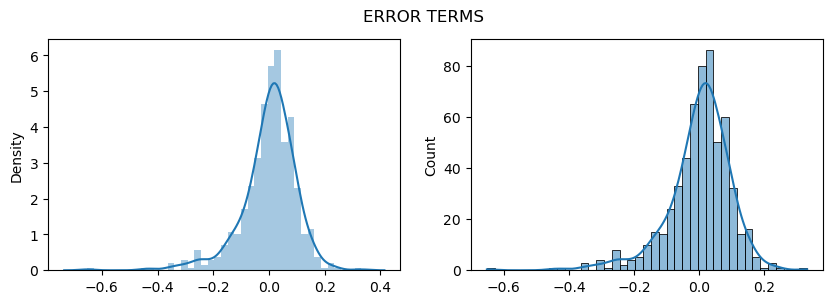

In [116]:
res=(y_train-y_train_predict)

plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.suptitle('ERROR TERMS')

sns.distplot(res)
plt.subplot(1,2,2)

sns.histplot(res,kde='reg')
plt.show()

<font color="black" style ="font-family:Cambria ;font-size:18px"><b>From The Graph We Come To Know That Our Error Terms Are Normally Distributed From That We Come To Know What Our Model Is Good  </b></font><br>

<font color= 'green' style = 'font-family:Cambria ; font-size:20px'>Assumption  Of `Linear Regression` Is `Homoscedasticity`</font><br>

- <font color=brown style = 'font-family:Cambria; font-size:18px'>The Variance Of The Residuals Is Constant Across All Levels Of The Independent Variable(S).</font><br>

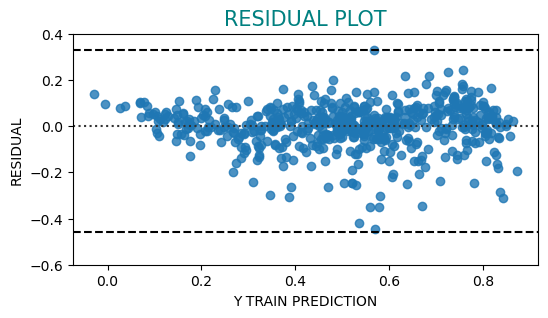

In [117]:

plt.figure(figsize=(6,3))


plt.title('RESIDUAL PLOT',fontdict={'color':'teal','fontsize':15},loc='center')
# ------------------------------------------
sns.residplot(x=y_train_predict,y=res)
# ------------------------------------------
plt.xlabel(xlabel='Y TRAIN PREDICTION',fontdict={'color':'black','fontsize':10})
plt.ylabel(ylabel='RESIDUAL',fontdict={'color':'black','fontsize':10})
plt.ylim(-0.6,0.4)
plt.axhline(y=0.33, color='black', linestyle='--') 
plt.axhline(y=-0.46, color='black', linestyle='--') 
plt.show()

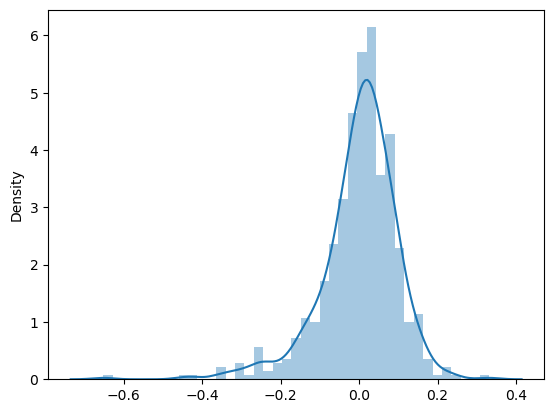

In [118]:
res=(y_train-y_train_predict)
sns.distplot(res)
plt.show()

<font color= 'green' style = 'font-family:Cambria ; font-size:20px'>Assumption  Of `Linear Regression` Is `No Autocorrelation of Errors:`</font><br>

- <font color=brown style = 'font-family:Cambria; font-size:16px'>The residuals are independent of each other (no autocorrelation)..</font><br>

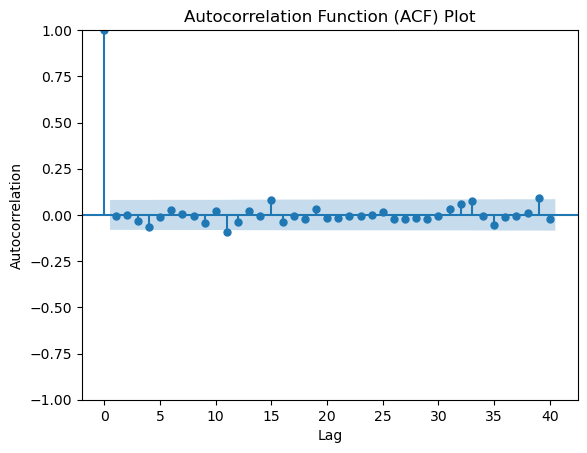

In [119]:
from statsmodels.graphics.tsaplots import plot_acf

# Assuming residuals is a DataFrame or Series containing the residuals
plot_acf(res, lags=40)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function (ACF) Plot")
plt.show()

<font color="black" style ="font-family:Cambria ;font-size:18px"><b>Predictions And Evaluation On The `Test Data Sets` </b></font>

In [120]:
# creating the listof numerical varibles
num_var=['temp','atemp','humidity','windspeed','count']
# fit on data
df_test[num_var]  =scaler.transform(df_test[num_var])
df_test.head(5)

,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,month_sept,holiday_yes,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,workingday_yes,weather_Best Condition,weather_Better Condition,Year
184,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
535,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1
299,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
221,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
152,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [121]:
df_test.describe()

,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,month_sept,holiday_yes,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,workingday_yes,weather_Best Condition,weather_Better Condition,Year
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.569603,0.542752,0.635933,0.315127,0.517368,0.226027,0.273973,0.219178,0.061644,0.075342,0.089041,0.075342,0.123288,0.102740,0.061644,0.075342,0.089041,0.054795,0.089041,0.034247,0.102740,0.219178,0.116438,0.089041,0.123288,0.178082,0.746575,0.650685,0.315068,0.445205
std,0.238088,0.222120,0.156357,0.161524,0.212757,0.419697,0.447530,0.415114,0.241335,0.264852,0.285783,0.264852,0.329899,0.304664,0.241335,0.264852,0.285783,0.228362,0.285783,0.182488,0.304664,0.415114,0.321854,0.285783,0.329899,0.383899,0.436469,0.478395,0.466142,0.498699
min,0.046591,0.025950,0.261915,-0.042808,0.055683,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.359075,0.346732,0.534457,0.196160,0.391251,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000
50%,0.560248,0.544652,0.614856,0.306383,0.508916,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,0.801929,0.743337,0.730570,0.411976,0.649994,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,0.984424,0.980934,1.002146,0.800793,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [122]:
df_test.shape

(146, 30)

In [123]:
y_test=df_test.pop('count')
X_test=df_test

In [124]:
# add constant
X_test_sm=sm.add_constant(X_test)
X_test_sm.head(3)

,const,temp,atemp,humidity,windspeed,season_spring,season_summer,season_winter,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,month_sept,holiday_yes,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,workingday_yes,weather_Best Condition,weather_Better Condition,Year
184,1.0,0.831783,0.769660,0.657364,0.084219,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
535,1.0,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1
299,1.0,0.511964,0.496145,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [125]:
x_train_sm.columns

Index(['const', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'month_dec', 'month_jan', 'month_july', 'month_nov',
       'month_sept', 'holiday_yes', 'weekday_mon', 'weather_Better Condition',
       'Year'],
      dtype='object')

In [126]:
X_test_sm.columns

Index(['const', 'temp', 'atemp', 'humidity', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_july', 'month_june', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sept', 'holiday_yes', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thurs', 'weekday_tues',
       'weekday_wed', 'workingday_yes', 'weather_Best Condition',
       'weather_Better Condition', 'Year'],
      dtype='object')

In [127]:
# in our final model we have some columns and we need to drop some of the columns 
# X_test_sm=X_test_sm.drop(['atemp','humidity','month_aug','month_feb','month_june','month_mar','month_may','month_oct',
#  'holiday_yes','weekday_mon', 'weekday_thurs','weekday_tues','weekday_wed','weather_Best Condition'],axis=1)

In [128]:
X_test_sm=X_test_sm[x_train_sm.columns]

In [129]:
X_test_sm.shape

(146, 15)

In [130]:
x_train_sm.columns.shape

(15,)

In [131]:
# predict
y_test_predict=lr_model.predict(X_test_sm)

In [132]:
y_test_predict

184    0.394974
535    0.903063
299    0.429229
221    0.581458
152    0.556098
404    0.457443
198    0.513178
171    0.473728
512    0.737484
200    0.566836
509    0.832179
559    0.683312
109    0.505897
467    0.686817
339    0.431290
589    0.815977
222    0.566842
40     0.139738
682    0.582748
453    0.582163
606    0.831388
265    0.612309
510    0.816052
19     0.112398
117    0.418297
423    0.512952
614    0.844964
163    0.503908
630    0.764023
191    0.495760
572    0.794637
662    0.741341
264    0.513623
625    0.654275
325    0.454315
114    0.535463
218    0.518810
678    0.698349
24     0.116527
432    0.385300
395    0.466046
48     0.343901
684    0.626994
203    0.607284
450    0.604152
538    0.804868
73     0.187293
269    0.612467
710    0.529031
98     0.332322
530    0.793738
173    0.474392
418    0.569706
503    0.807945
727    0.360809
550    0.805059
714    0.544170
448    0.540597
248    0.444242
685    0.611763
410    0.511338
201    0.481686
41     0


 
<font color="black" style ="font-family:Cambria ;font-size:18px"><b>Checking R squared Value </b></font>

In [133]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [134]:
print('The R Squared Value Of Test Set is'  ,r2_score(y_true=y_test,y_pred=y_test_predict))

The R Squared Value Of Test Set is 0.7504929563413034


In [135]:
print('The R Squared Value Of Train Set is :',r2_score(y_true=y_train,y_pred=y_train_predict))
print('The R Squared Value Of Test Set is :',r2_score(y_true=y_test,y_pred=y_test_predict))

The R Squared Value Of Train Set is : 0.8060164489091626
The R Squared Value Of Test Set is : 0.7504929563413034


In [136]:
print('Mse Train',mean_squared_error(y_true=y_train,y_pred=y_train_predict))
print('Mse Test',mean_squared_error(y_true=y_test,y_pred=y_test_predict))

Mse Train 0.009832875329810111
Mse Test 0.011216707846128956


In [137]:
mean_absolute_error(y_true=y_test,y_pred=y_test_predict),mean_absolute_error(y_true=y_train,y_pred=y_train_predict)

(0.08218126501157974, 0.0703465906774761)

<font color="black" style ="font-family:Cambria ;font-size:18px"><b>7. Visualization of Results: </b></font><br>

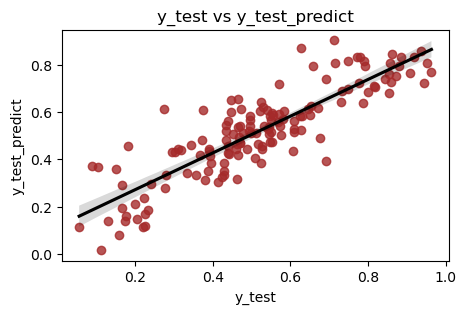

In [138]:
plt.figure(figsize=(5,3))
plt.title('y_test vs y_test_predict')

sns.regplot(x=y_test,y=y_test_predict,color='brown',line_kws={"color": "black"})
plt.xlabel('y_test')
plt.ylabel('y_test_predict')
plt.show()

In [139]:
X_test_sm.columns

Index(['const', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'month_dec', 'month_jan', 'month_july', 'month_nov',
       'month_sept', 'holiday_yes', 'weekday_mon', 'weather_Better Condition',
       'Year'],
      dtype='object')

In [140]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     168.9
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          5.11e-192
Time:                        18:38:21   Log-Likelihood:                 520.97
No. Observations:                 584   AIC:                            -1012.
Df Residuals:                     569   BIC:                            -946.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2297      0.033      6.879      0.000       0.164       0.295
temp                         0.4710      0.038     12.532      0.000       0.397       0.545
windspeed                   -0.1867      0.026     -7.194      0.000      -0.238      -0.136
season_spring               -0.0678      0.022     -3.064      0.002      -0.111      -0.024
season_summer                0.0419      0.016      2.635      0.009       0.011       0.073
season_winter                0.0900      0.018      4.989      0.000       0.055       0.125
month_dec                   -0.0487      0.018     -2.748      0.006      -0.083      -0.014
month_jan                   -0.0375      0.019     -2.002      0.046      -0.074      -0.001
month_july                  -0.0503      0.019     -2.604      0.009      -0.088      -0.012
month_nov                   -0.0444      0.020     -2.243      0.025      -0.083      -0.006
month_sept                   0.0535      0.018      3.052      0.002       0.019       0.088
holiday_yes                 -0.0913      0.026     -3.524      0.000      -0.142      -0.040
weekday_mon                 -0.0480      0.012     -4.142      0.000      -0.071      -0.025
weather_Better Condition    -0.0691      0.009     -7.760      0.000      -0.087      -0.052
Year                         0.2357      0.008     28.150      0.000       0.219       0.252
==============================================================================
Omnibus:                      183.560   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              794.441
Skew:                          -1.365   Prob(JB):                    3.09e-173
Kurtosis:                       8.020   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


<b><font color= 'green' style = 'font-family:cambria ; font-size:20px'>The Equation Be Like This </font></b>

$Count =	0.2297	 + (temp * 0.4710) + (windspeed * -0.1867) +(Season spring *-0.0678)+ (Season summer * 0.0419) + (Season winter * 0.0900)+ (Month Dec * -0.0487)+ (Month Jan * -0.0375)+ (Month july * 	-0.0503	)+ (Month Nov * -0.0444	)  + (Month Sept * 	0.0535)+(holiday yes * -0.0913) +  (weekday mon * 	-0.0480)+ (weather Better Condition * -0.0691) + (Year*0.2357)$

<b><font color= 'green' style = 'font-family:cambria ; font-size:20px'>Final Conclusion </font></b>

 <font color="brown" style="font-family:Cambria ;font-size:18px">After Building A Linear Regression Model, We Obtained An `R-Squared` Value Is `0.806` .And `Adj. R-squared Value` Is `0.801`During The Model-Building Process, We Identified Specific Columns By Removing Those With A P-Value Greater Than 0.05 And Addressing Multicollinearity Through VIF Analysis.Hence We Can Conclude That Our Model Is Predicting The Dependent Variable Effectively</font>

<b><font color= 'green' style = 'font-family:cambria ; font-size:20px'>Buisness Recommendation
 </font></b>

<font color="black" style="font-family:Cambria ;font-size:18px">`Temperature`: Most important factor affecting demand is temperature. With a coefficient of 0.4710, for every change in temperature of 1 degrees, demand increases by a factor of 0.4710 (temperature x 0.2357). Based on this, company will have to consider:Necessary capacity building during hotter months to fulfil the demand</font><br>

<font color="black" style="font-family:Cambria ;font-size:18px">`Year`: Second most important factor is year with a coefficient value of 0.2357. Based on the historical data, given all internal and external factors remain unchanged, the company is expected to see annual growth over last year at around 23.57%.This helps us in factoring teh revenue and cost projections over a period of time.</font><br>

<font color="black" style="font-family:Cambria ;font-size:18px">`Winter`:Third most important factor is winter with a coefficient of 0.0900. This signifies that every winter, the demand is expecteed to incerase by a factor of 0.0900 based on other months.From the available data, Winter season constitutes of Sep, Oct, Nov and December months.Company needs to work on capacity planing of these months and additionally plan for promotional campaigns in case a competitors exist with similar value propositions</font><br>


<font color="black" style="font-family:Cambria ;font-size:18px">`Month Sept`:fourth most important factor is 𝑀𝑜𝑛𝑡ℎ𝑆𝑒𝑝𝑡 with a coefficient of 0.0535. This signifies that 𝑀𝑜𝑛𝑡ℎ𝑆𝑒𝑝𝑡 , the demand is expecteed to incerase by a factor of 0.0535 based on other months. in september month the sales are incresed </font><br>

<font color="black" style="font-family:Cambria ;font-size:18px">`Season_summer`:fifth most important factor is summer with a coefficient of 0.0419. This signifies that every summer season , the demand is expecteed to incerase by a factor of 0.0419 based on other months.From the available data, Summer season constitutes of apr, may, june months.Company needs to work on capacity planing of these months and additionally plan for promotional campaigns in case a competitors exist with similar value propositions</font><br>

